In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import display
import seaborn as sns
sns.set()
import statsmodels

## NOTE :  Statsmodels 0.14.0 IS USED

In [29]:
statsmodels.__version__

'0.14.0.dev482+g35b803767'

In [2]:
train = pd.read_csv("timeseriestrain.csv")

display(train)

Date          T         RH Gas        Value
0     15/3/2016  12.020833  54.883334  CO  1053.200000
1     16/3/2016   9.833333  64.069791  CO   995.250000
2     17/3/2016  11.292708  51.107292  CO  1025.250000
3     18/3/2016  12.866319  51.530903  CO  1064.444444
4     19/3/2016  16.016667  48.843750  CO  1088.741667
...         ...        ...        ...  ..          ...
1307   1/2/2017   5.267708  39.614930  O3   553.180556
1308   2/2/2017 -55.515972 -24.010417  O3   343.500000
1309   3/2/2017 -14.272917  28.563542  O3   334.458333
1310   4/2/2017   4.848611  37.832986  O3   379.513889
1311   5/2/2017   7.273958  31.809375  O3   947.333333

[1312 rows x 5 columns]

In [3]:
def clean(df):
    df =df.pivot(values = 'Value' , index = ['Date' , 'T' , 'RH'], columns = 'Gas').reset_index()

    df.columns.name = 'cols'
    df = df.assign(Date = pd.to_datetime(df.Date  , dayfirst = True)  ).sort_values("Date").set_index('Date')
    return df


In [4]:
train = clean(train)


In [5]:
train

cols                T         RH           CO          HC          NO2  \
Date                                                                     
2016-03-15  12.020833  54.883334  1053.200000  729.800000   933.800000   
2016-03-16   9.833333  64.069791   995.250000  681.441667  1021.750000   
2016-03-17  11.292708  51.107292  1025.250000  806.583333   881.375000   
2016-03-18  12.866319  51.530903  1064.444444  794.258333   794.527778   
2016-03-19  16.016667  48.843750  1088.741667  755.083333   800.883333   
...               ...        ...          ...         ...          ...   
2017-02-01   5.267708  39.614930   729.422222  562.650000   797.647222   
2017-02-02 -55.515972 -24.010417   474.291667  347.480556   508.180556   
2017-02-03 -14.272917  28.563542   615.700000  414.475000   819.733333   
2017-02-04   4.848611  37.832986   691.713889  458.947222   909.375000   
2017-02-05   7.273958  31.809375   867.600000  751.833333   673.741667   

cols                O3  
Date                    
2016-03-15  876.833333  
2016-03-16  708.025000  
2016-03-17  867.375000  
2016-03-18  996.625000  
2016-03-19  987.341667  
...                ...  
2017-02-01  553.180556  
2017-02-02  343.500000  
2017-02-03  334.458333  
2017-02-04  379.513889  
2017-02-05  947.333333  

[328 rows x 6 columns]

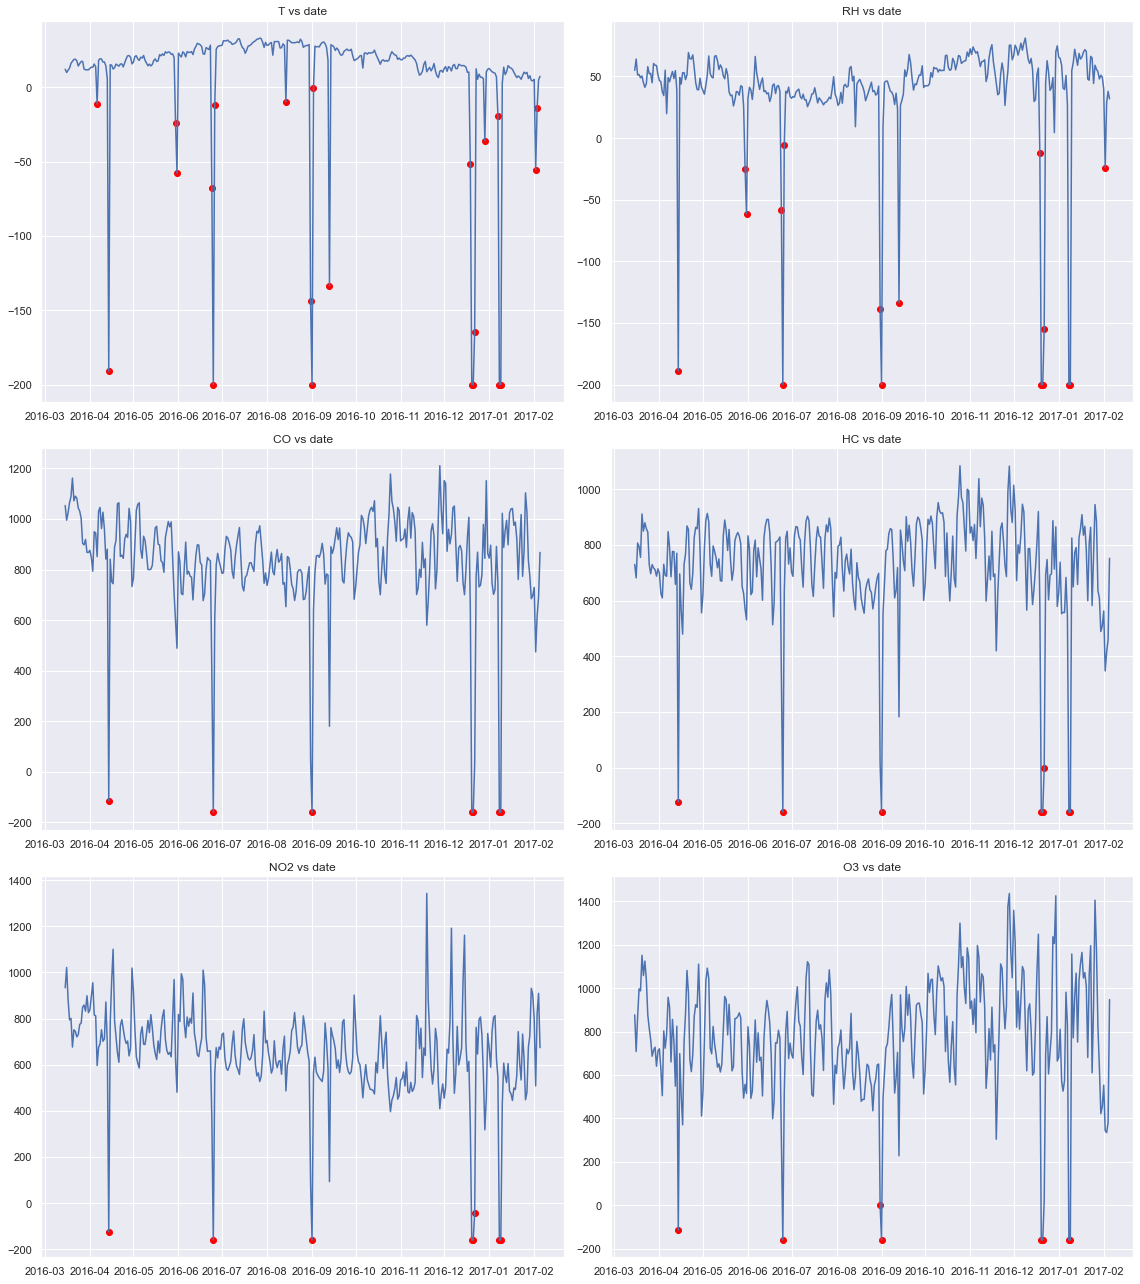

In [6]:
plt.figure(figsize = (16,18))

for i,col in  enumerate(train.columns):
    plt.subplot( len(train.columns)//2 , 2, i+1)

    plt.title(col + ' vs date')
    plt.plot(train[col])
    outliers = train[col][train[col] < 0 ]
    plt.scatter( outliers.index , outliers  , color = 'red')
#     ax2 = plt.gca().twinx()
    
#     ax2.plot(train['T'] , color = 'Orange')
    
    
plt.tight_layout()
plt.show()

- The normal gas temperatures hover around the 600 to 700 range, however there are some  negative values that are impossible as highlighted by the red dots
- It is most likely caused by errornous data collection and needs to be removed

- However, I realised that When Temperature and RH has values that are negative the gas values are also negative, to investigate further , I decided to inspect the DataFrame itself.

In [7]:
train.loc[(train['T'] < 0)|(train['RH'] < 0) | (train['NO2'] < 0) | (train['HC'] < 0) | (train['O3'] < 0) | (train['CO'] < 0), :] 

cols                 T          RH          CO          HC         NO2  \
Date                                                                     
2016-04-06  -11.426042   19.742014  850.991667  687.247222  596.386111   
2016-04-14 -191.164583 -188.839583 -114.133333 -122.766667 -124.466667   
2016-05-30  -23.920833  -24.786458  598.225000  569.850000  623.550000   
2016-05-31  -57.951736  -61.500694  489.027778  530.961111  480.750000   
2016-06-24  -68.069792  -58.296875  385.402778  326.963889  362.972222   
2016-06-25 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2016-06-26  -12.148958   -5.416667  606.991667  630.991667  560.566667   
2016-08-14   -9.852431    9.186111  652.894444  566.805556  486.658333   
2016-08-31 -144.072917 -138.672917   48.866667   14.841667   82.016667   
2016-09-01 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2016-09-02   -0.613542    9.307292  642.800000  555.500000  566.891667   
2016-09-13 -133.732292 -133.684375  180.166667  182.550000   92.991667   
2016-12-19  -51.363194  -11.956250  648.391667  588.127778  333.647222   
2016-12-20 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2016-12-21 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2016-12-22 -164.510417 -154.515625   29.025000   -0.166667  -43.350000   
2016-12-29  -36.022917    4.436111  844.372222  712.916667  317.875000   
2017-01-07  -19.247917   26.868750  745.391667  542.716667  545.166667   
2017-01-08 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2017-01-09 -200.000000 -200.000000 -160.000000 -160.000000 -160.000000   
2017-02-02  -55.515972  -24.010417  474.291667  347.480556  508.180556   
2017-02-03  -14.272917   28.563542  615.700000  414.475000  819.733333   

cols                 O3  
Date                     
2016-04-06   789.052778  
2016-04-14  -114.958333  
2016-05-30   557.075000  
2016-05-31   514.877778  
2016-06-24   305.705556  
2016-06-25  -160.000000  
2016-06-26   519.941667  
2016-08-14   590.861111  
2016-08-31    -0.975000  
2016-09-01  -160.000000  
2016-09-02   493.341667  
2016-09-13   228.008333  
2016-12-19   794.986111  
2016-12-20  -160.000000  
2016-12-21  -160.000000  
2016-12-22    18.833333  
2016-12-29  1205.241667  
2017-01-07   828.241667  
2017-01-08  -160.000000  
2017-01-09  -160.000000  
2017-02-02   343.500000  
2017-02-03   334.458333

- When the T and RH values are exactly -200 , the gas values are -160, this can be seen in days like 2016-06-25 , 2016-09-01 , 2016-12-20 etc
- The days before or after the -200/-160 values are also negative or outliers that are significantly below the normal gas values from 700 to 900 
- for example, 2016-09-01 has -160/-200 values, 2016-08-31 and 2016-09-02 has values that are around less than 20 
- 2017-01-09 has -200/-160 values , and 2017-02-02 has values that range from 300 to 500 which is still significantly less than the normal gas values from 700 to 900
- Hence, there is a need to deal with them while generating predictions for kaggle 

- For the kaggle test set, if T and RH has values -200, the prediction for gas values should be -160

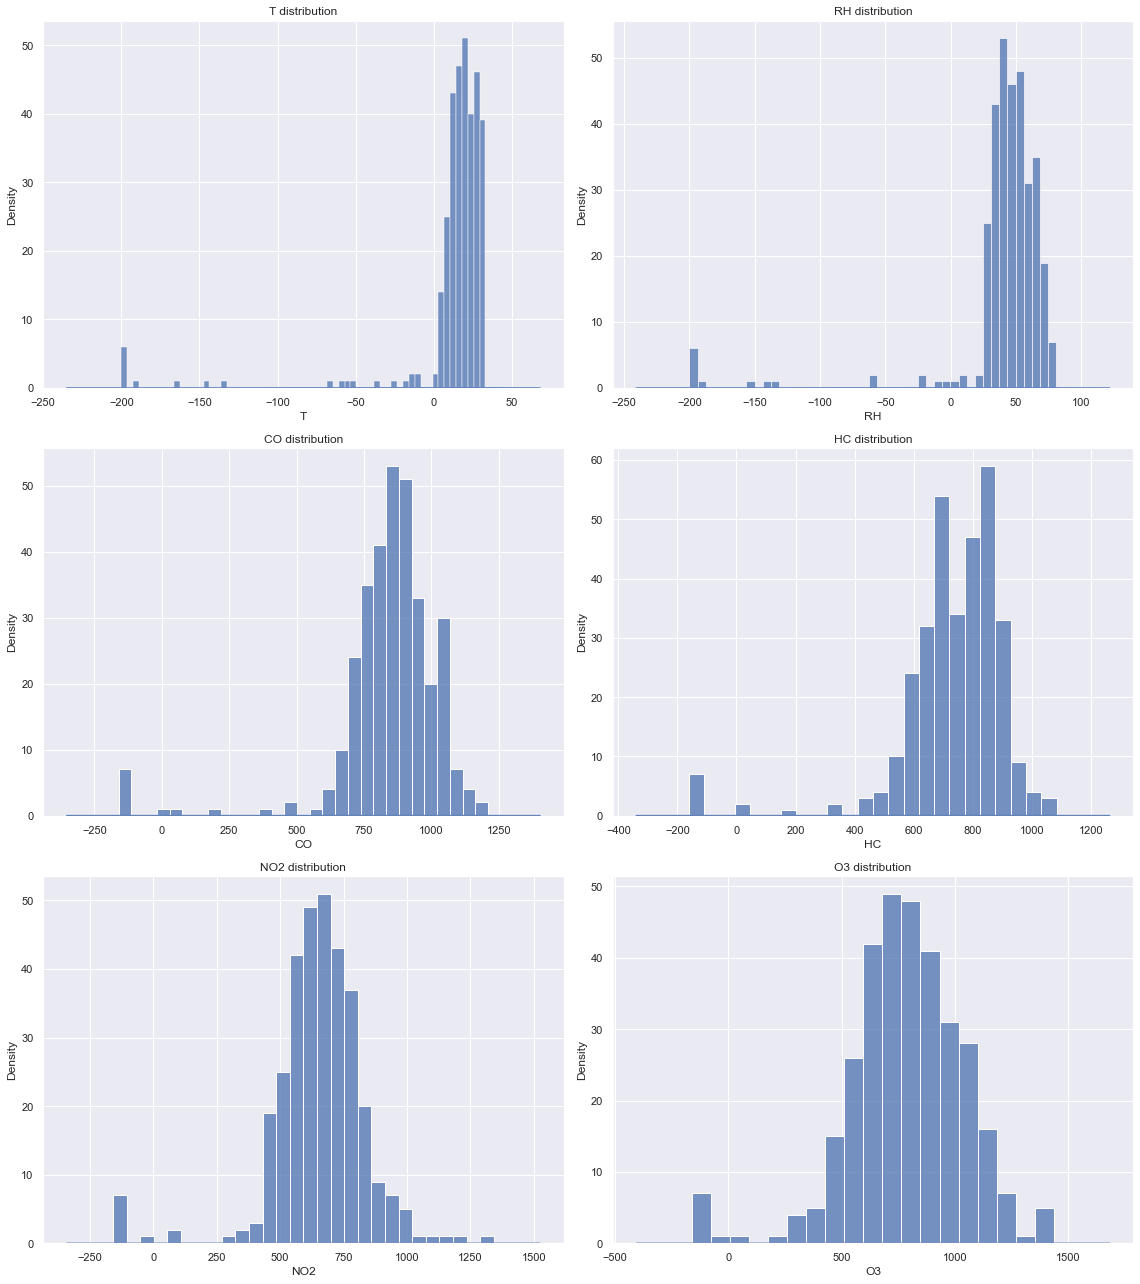

In [8]:
plt.figure(figsize = (16,18))

for i,col in  enumerate(train.columns):
    plt.subplot( len(train.columns)//2 , 2, i+1)

    plt.title(col + ' distribution')
    sns.kdeplot(train[col] ,ax = plt.gca() )

    sns.histplot(train[col] ,ax = plt.gca() )
plt.tight_layout()
plt.show()

- Presense of many outliers/impossible values that need to clean 
- Impossible for RH and all concentration of gases to be negative 
- also impossible for temperature to be so close to -200 degrees , such temperatures so close to abosolute 0 should only exist in labs
- not likely for temperature to drop from around 10+/20+ degree to -negative then back to positive in such a short period of time



In [9]:
cleaned = train.copy()

#### Handling Impossible Values

- Negative values (-200) are considered erronous in data collection or a way to encode null values  , as negative values for gas concentrations are impossible
- Hence, they must be interpolated with the correct values

In [10]:
cleaned.loc[(cleaned['T'] < 0)|(cleaned['RH'] < 0) | (cleaned['NO2'] < 0) | (cleaned['HC'] < 0) | (cleaned['O3'] < 0) | (cleaned['CO'] < 0), :] = np.nan
display('Before',cleaned.isnull().sum())
cleaned.interpolate(method='time',inplace=True , limit_direction  = 'forward')
display('After',cleaned.isnull().sum())

'Before'

cols
T      22
RH     22
CO     22
HC     22
NO2    22
O3     22
dtype: int64

'After'

cols
T      0
RH     0
CO     0
HC     0
NO2    0
O3     0
dtype: int64

In [11]:
100 * cleaned.isnull().sum() / len(cleaned)

cols
T      0.0
RH     0.0
CO     0.0
HC     0.0
NO2    0.0
O3     0.0
dtype: float64

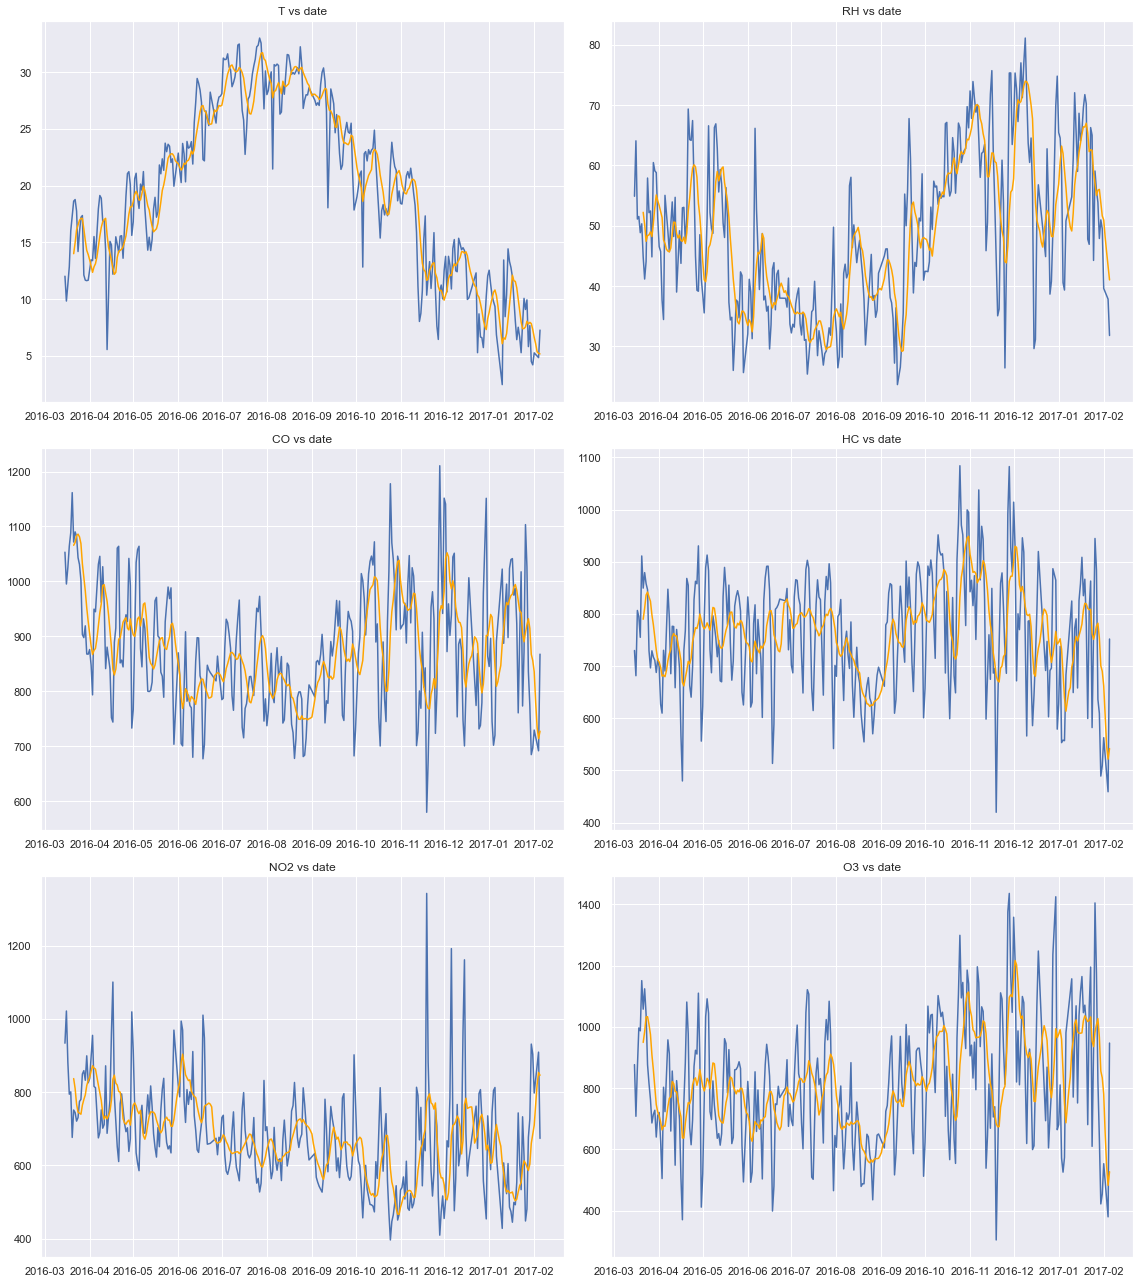

In [12]:
plt.figure(figsize = (16,18))
import math
for i,col in  enumerate(cleaned.columns):
    plt.subplot( math.ceil(len(cleaned.columns)/2)  , 2, i+1)
 
    plt.title(col + ' vs date')
    
    plt.plot(cleaned[col])
    plt.plot(cleaned[col].rolling(7).mean()  , color = 'orange')
    
    
plt.tight_layout()
plt.show()

### Outliers
- Although impossible negative values are removed, outliers still remain in the data
- We can see that the graph contains outlier for example the no2 and o3 values that are above 1000
- Outliers are not removed in the kaggle set and removing the outliers for training will lead to very poor predictions in kaggle 
- Hence, We will not remove them as removing them will lead to the model to be not robust to outliers 
- The trend of the dataset looks roughly flat for the 4 gases, so the data looks stationary but we need to confirm this with the ADF test

## Augmented Dickey-Fuller test 
- To determine if simple differencing required
- H0: Time Series is non stationary 
- H1: Time Series is stationary
- If null hypothesis rejected no differencing required  else differencing is required

In [13]:
from statsmodels.tsa.stattools import adfuller
adtestresults = []
kpssresults = []
for i in  ['CO' , 'HC' , 'NO2' , 'O3']:
    results = adfuller( cleaned[i] )
    adtestresults.append( { 'gas' : i, 'test-pvalue' : results[1]  , 'critical 5% value' : results[4]['5%'] , 'ADF Statistic' :results[0] ,'stationary?' : results[1] < 0.05} )
print("Adfuller Test")
display(pd.DataFrame( adtestresults))


Adfuller Test


gas  test-pvalue  critical 5% value  ADF Statistic  stationary?
0   CO     0.004101          -2.870760      -3.700862         True
1   HC     0.007592          -2.870819      -3.515753         True
2  NO2     0.001777          -2.870586      -3.937339         True
3   O3     0.008847          -2.870819      -3.468048         True

- All gases are stationary and hence differencing is not done on the dataset 

### Decomposition and  seasonal strength 

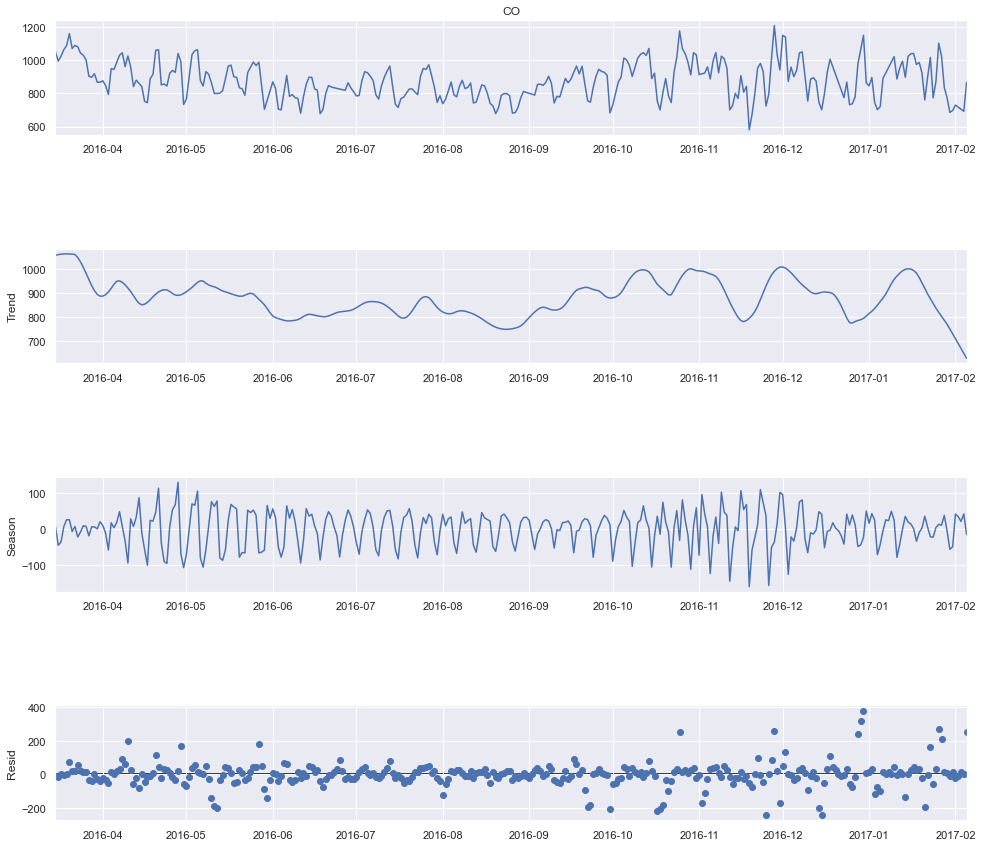

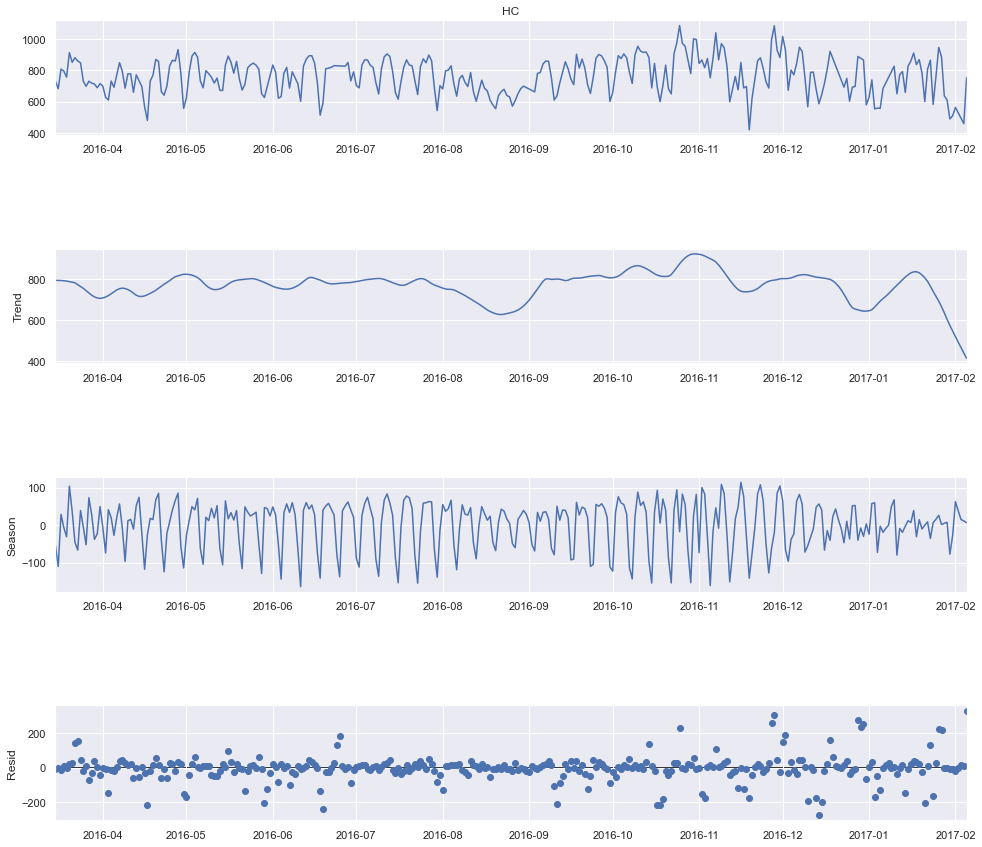

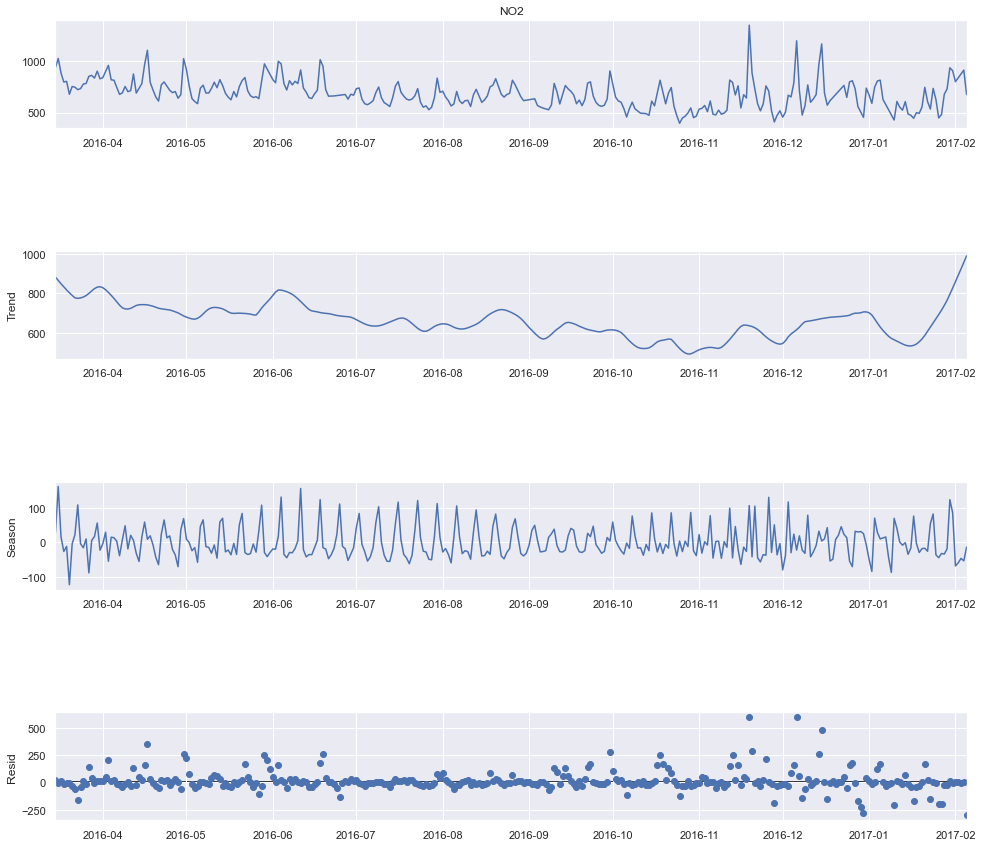

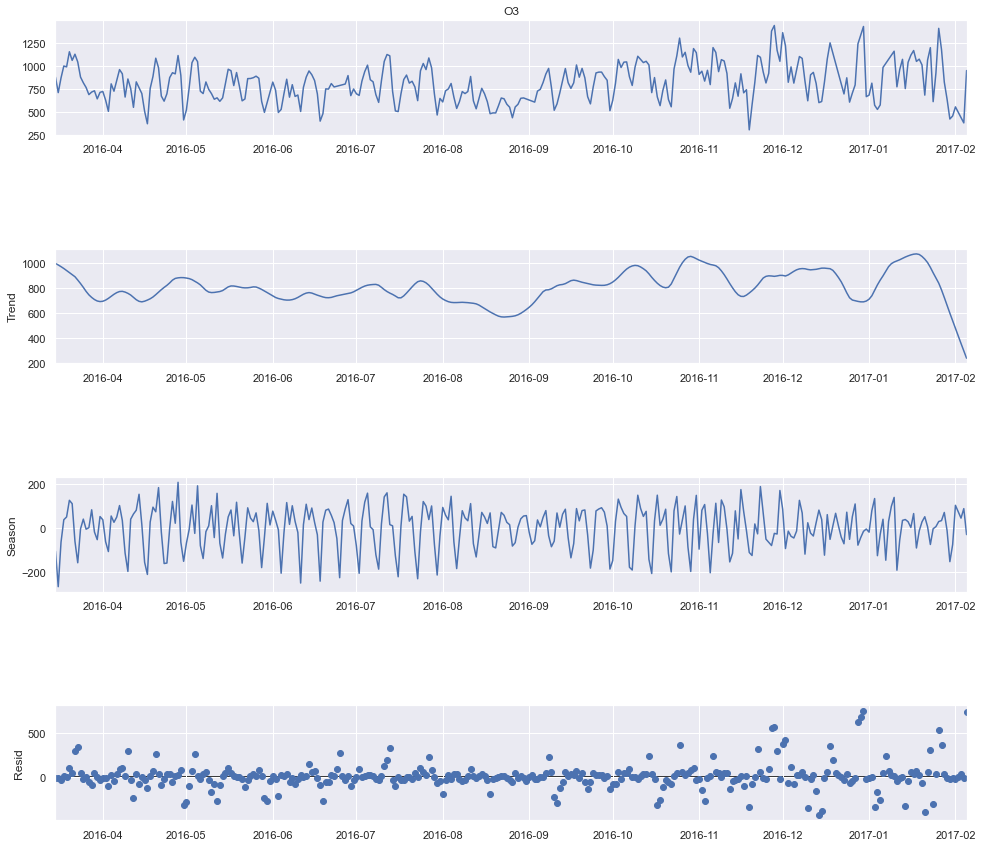

Sesonality and trend strength


CO        HC       NO2        O3
Trend Strength     0.501242  0.392143  0.440486  0.377787
Seasonal Strength  0.198897  0.338138  0.179632  0.218649

In [14]:
from statsmodels.tsa.seasonal import  STL
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from scipy import stats
from collections import defaultdict
strengths = defaultdict(dict)
for i in ['CO' , 'HC' , 'NO2' , 'O3']:
   # plt.figure(figsize = (16,9))
    stl = STL(cleaned[i],robust = True   ).fit()
    fig = stl.plot()
    strengths[i]['Trend Strength'] = max([0 , 1- (stl.resid.var() / (stl.trend + stl.resid).var() )])
    strengths[i]['Seasonal Strength'] = max([0 , 1- (stl.resid.var() / (stl.seasonal + stl.resid).var() )])
    fig.set_size_inches(16,14)
    fig.get_axes()[0].set_title(i)
    plt.show()

    
print("Sesonality and trend strength")
pd.DataFrame(strengths)


> CO
For the trend component, it is generally stable from April 2016 to October 2016, There are some ups and downs from November 2016 to Feb 2017 .
For the Seasonal components, there are higher highs and lower lows from April to June 2016 and November to December 2016

> HC
The Trend component is generally stable (no distinct ups and downs) except from 2017 Jan to 2017 Feb, there is a decrease in HC level from 800  to 400.
For Seasonal Components, HC has higher highs and lower lows from June to August 2017 and from October to December of 2016 and a period of lower highs and higher lows in September


> NO2
 The trend component slightly trends downward from April to November 2016 remains level to 2017 January and increases sharply from Jan 2017 to  Feb 2017, which might signal a start of activities (factories) 
NO2 has higher highs and lower lows from June to August 2017 

> O3
Trend generally stable, except a decrease from 1000 to 200 from January to February 2017
Higher highs and lower lows from 2016 June to 2016 August



- Trend for all gases generally stable, as they all stay around the same level, and hence the data set is most likely stationary 
- Except for Close to the end of the dataset (from mid  Jan 2017 to start Feb 2017,  the trend componenent of CO, HC and O3 decreases sharply while the NO2 increases sharply


- CO has the strongest trend 
- O3 has the weakest trend
- HC has strongest seasonality
- O3 has weakest seasonality
- No seasonal differcing is required as all seasonal strengths < 0.64

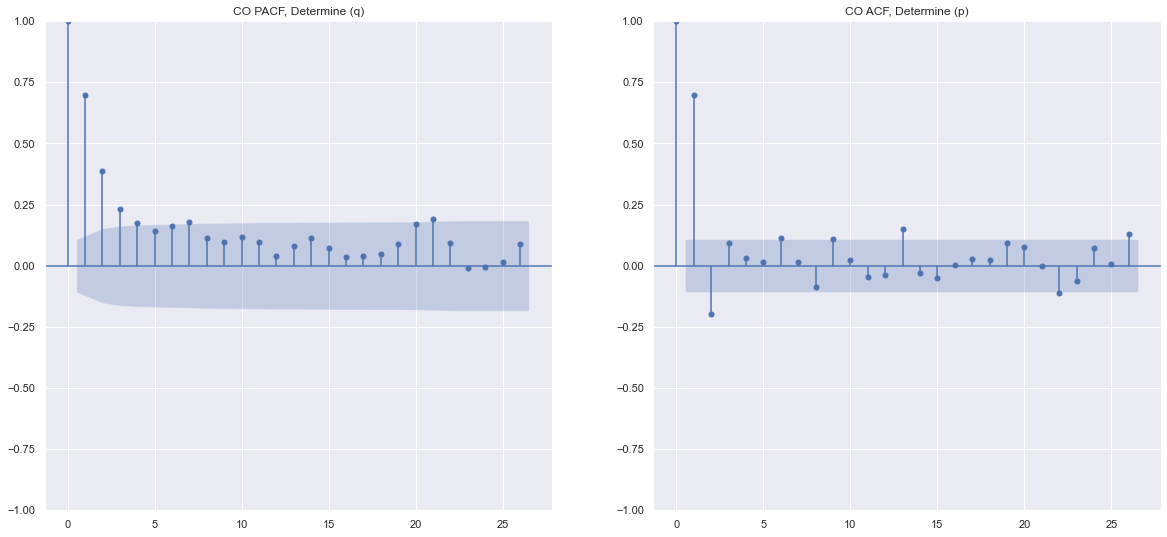

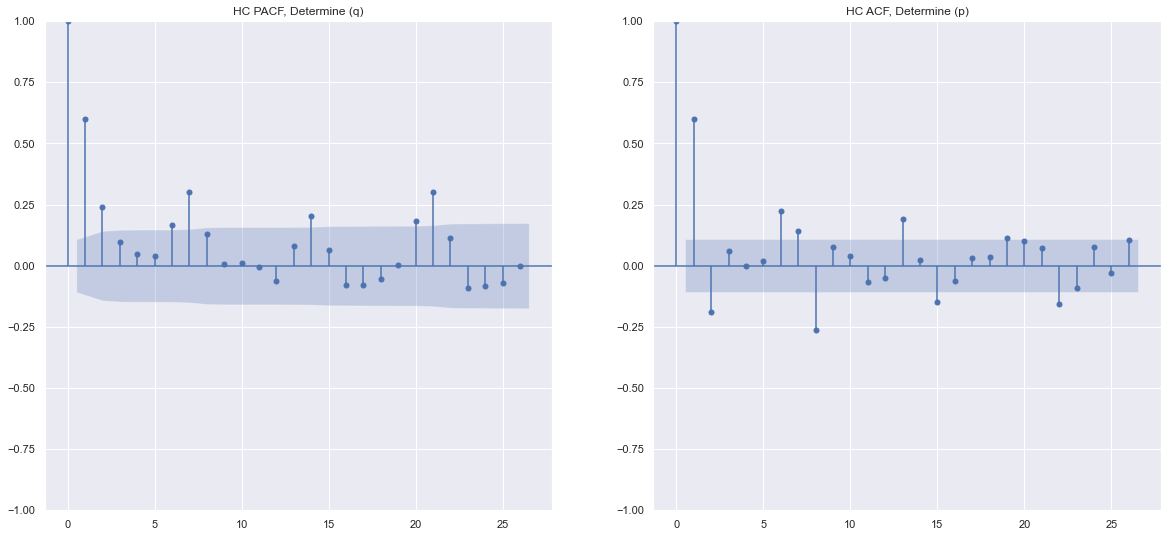

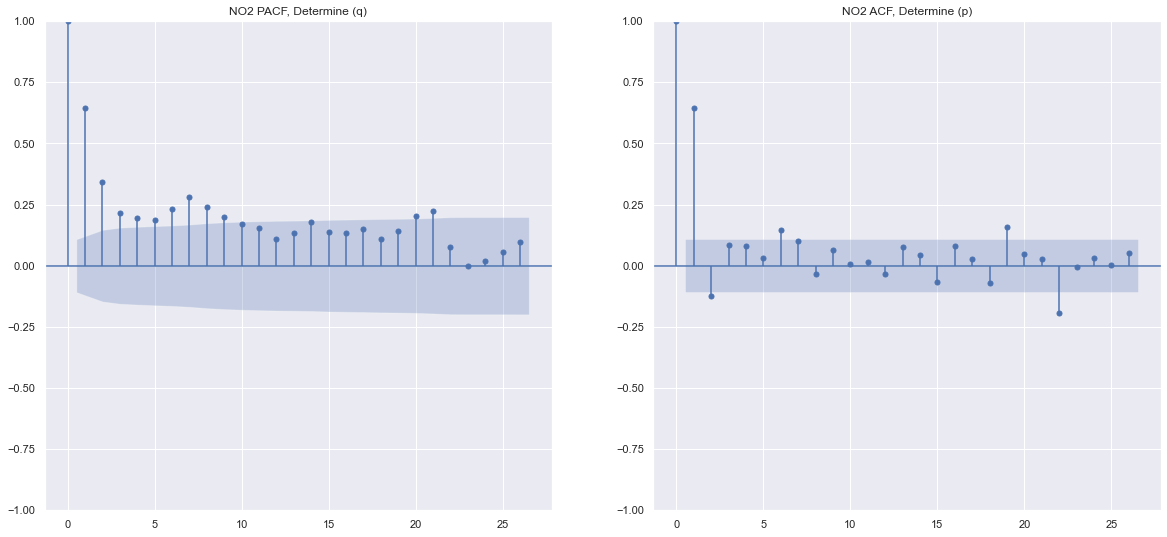

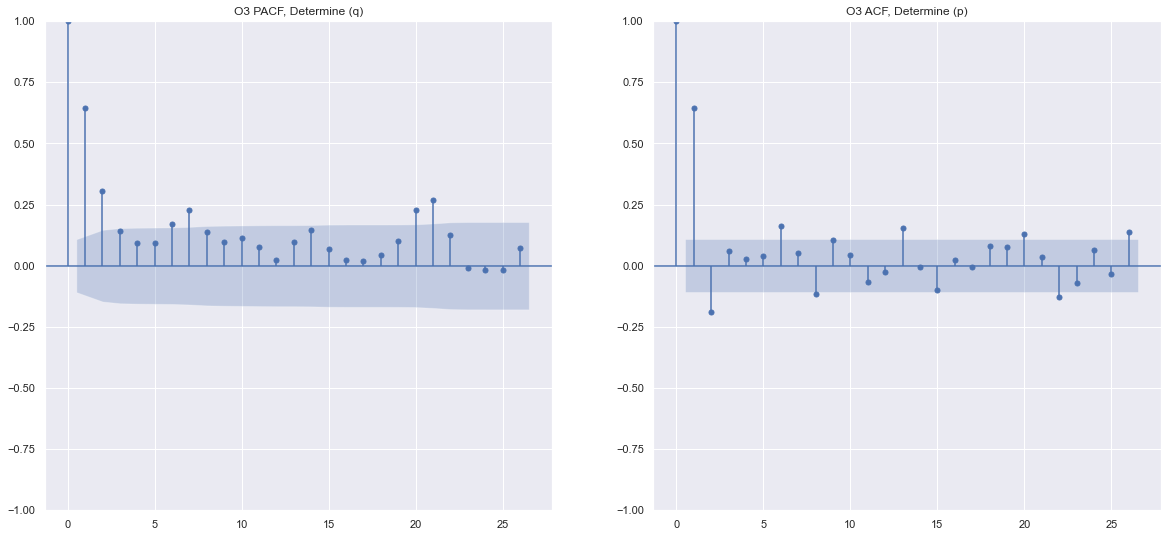

In [15]:
import statsmodels.api as sm
import numpy as np
#cleaned = boxcoxxed.interpolate(method = 'time') 
for i in  ['CO' , 'HC' , 'NO2' , 'O3']:
    tempd = cleaned[i]
    plt.figure(figsize = (20,9))
    plt.subplot(121)

    sm.graphics.tsa.plot_acf(tempd, ax = plt.gca()    )
    plt.title(i +' PACF, Determine (q)')

    plt.subplot(122)
    sm.graphics.tsa.plot_pacf(tempd, ax = plt.gca()    )
    plt.title(i +' ACF, Determine (p)')


 

   # plt.ylim(top = 1.1 , bottom = -0.4)
    plt.show()

### Possible Orders for SARIMA/ARIMA
- Based on the significant lags shown ( the lags outside the 95% confidence interval region) above
- These parameters are rough ranges of what orders to tune the ARIMA / ARIMAX
Gas |p | q|
:-------------------|:---------------|:---------------
CO| 2 | 0 (exponential  decay / hard to determine the exact value from graph , requires hyperparameter tuning later ) | 
HC| 2| 2 |  
NO2| 2| 0 (exponential  decay / hard to determine the exact value from graph , requires hyperparameter tuning later)|  
O3| 2 | 2|



### Feature Engineering

$$T_s = (b × α(T,RH)) / (a - α(T,RH))$$
$$\text{Where α(T,RH) = ln(RH/100) + aT/(b+T), T = Temperature, RH = Relative Humidity, $T_s$ = Dew Point, a,b = magnus coefficients  }$$
 a = 17.625 and b = 243.04 °C
 
 - **isweekend** is a boolean feature (0 if not weekend 1 if isweekend)

- isWeekend might useful, as the activities that produces these gases (factories/industries) are no in operation during weekends
- Features like dew point temperature helps to predict the amount of gas in the air as higher the dew point temperature the higher the amount of water is in the air [according to  weather.gov](https://www.weather.gov/arx/why_dewpoint_vs_humidity) which can affect gas levels due to the interactions between gas and water


In [16]:

cleaned['dewpt']  = (243.04 * (np.log(cleaned['RH']/100) + ((17.625*cleaned['T'])/ (243.04 + cleaned['T'])))  )/ \
 (17.625 - (np.log(cleaned['RH']/100) + (17.625*cleaned['T'])/ (243.04 + cleaned['T'])) )
cleaned['isweekend'] =(( cleaned.index.dayofweek == 5 ) |  ( cleaned.index.dayofweek == 6 ) ).astype(int)

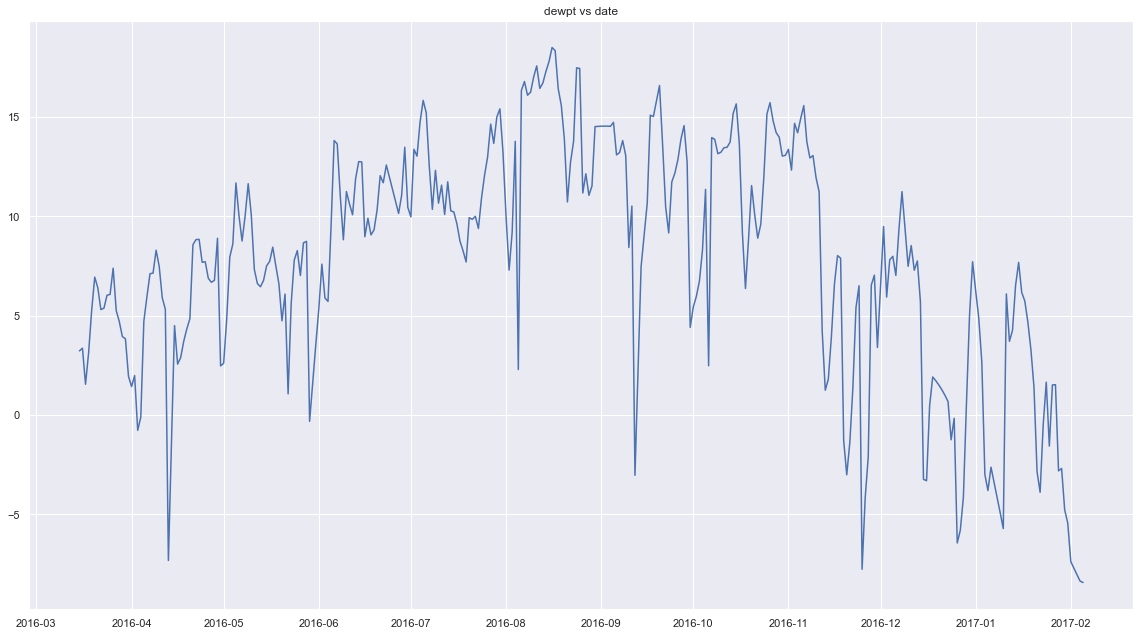

In [17]:
plt.figure(figsize = (16,9))

plt.title('dewpt' + ' vs date')

plt.plot(cleaned['dewpt'])

    
plt.tight_layout()
plt.show()

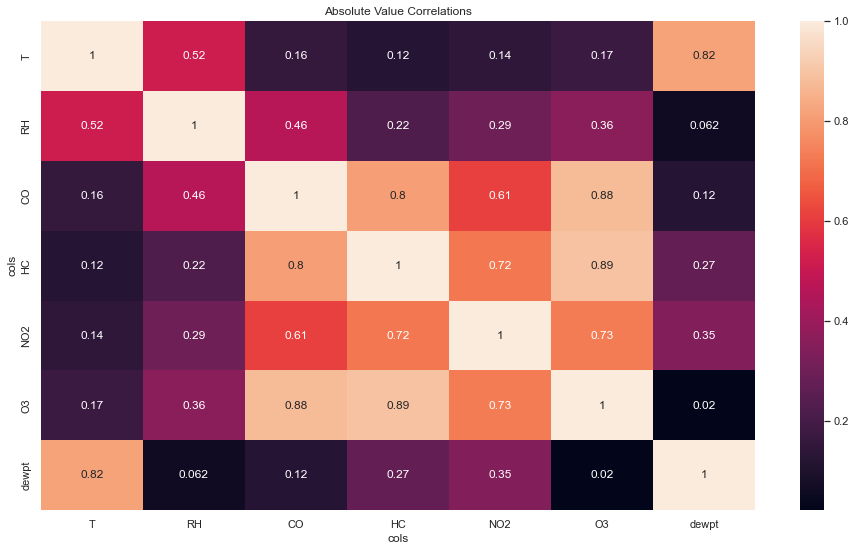

In [18]:
plt.figure(figsize = (16,9)) 
plt.title("Absolute Value Correlations")
sns.heatmap(cleaned.drop(columns = 'isweekend').corr().abs() , annot = True)
plt.show()

interval columns not set, guessing: ['T', 'RH', 'CO', 'HC', 'NO2', 'O3', 'dewpt', 'isweekend']


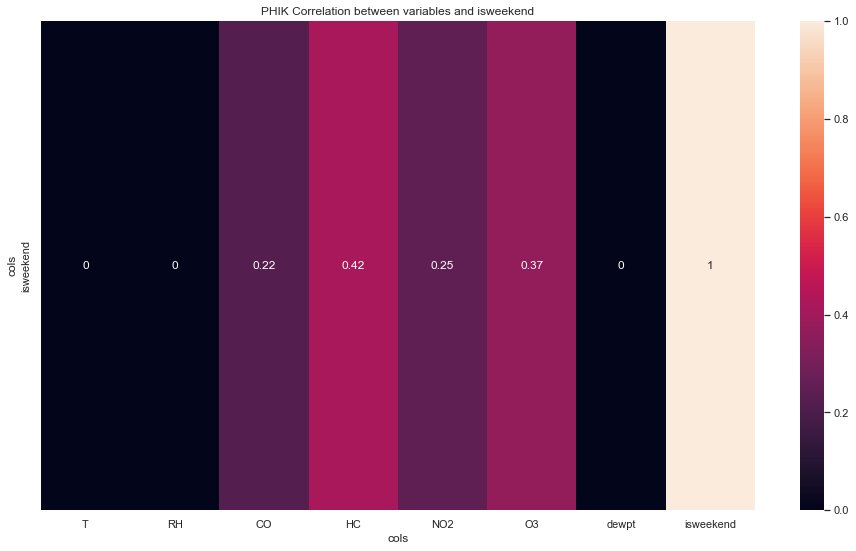

In [19]:
import phik
plt.figure(figsize = (16,9)) 
plt.title("PHIK Correlation between variables and isweekend")
sns.heatmap(cleaned.phik_matrix().abs().loc[['isweekend'] , : ] , annot = True)
plt.show()

- The correlation between the gases and each other is quite high with the highest correlation of 0.89 between o3 and hc and lowest of 0.61 between no2 and co 
- Such high correlations between the gases might imply that the gases influence each other and hence, models such as `VARMAX` can be used, but further analysis (granger causality test) needed
- Some correlation exists between the exogenous variables and gas, e.g 0.46 between CO and RH, 
- These correlations is useful for the exogenous variables to predict the gas values 

- Feature engineered features also have significant correlations with the gases, with the highest being 0.35 correlation between dew point and NO2. 
- The highest phik correlation between isweekend and gas values is 0.37 between O3 and is weekend

# Granger Causality Test
- It shows whether the lagged variable of a time series is able to predict another time series
- H0 : cointegration does not exist
- H1 : conintegration exists 
- pvalue < 0.05 , means it is suitable to perform multivariate modelling 

C:\Users\yee88\Desktop\python\pyproj\Panda\mycondaenv3\lib\site-packages\statsmodels\tsa\stattools.py:1480: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\yee88\Desktop\python\pyproj\Panda\mycondaenv3\lib\site-packages\statsmodels\tsa\stattools.py:1480: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\yee88\Desktop\python\pyproj\Panda\mycondaenv3\lib\site-packages\statsmodels\tsa\stattools.py:1480: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\yee88\Desktop\python\pyproj\Panda\mycondaenv3\lib\site-packages\statsmodels\tsa\stattools.py:1480: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
C:\Users\yee88\Desktop\python\pyproj\Panda\mycondaenv3\lib\site-packages\statsmodels\tsa\stattools.py:1480: FutureWarning: verbose is deprecated since functions should not print results
  

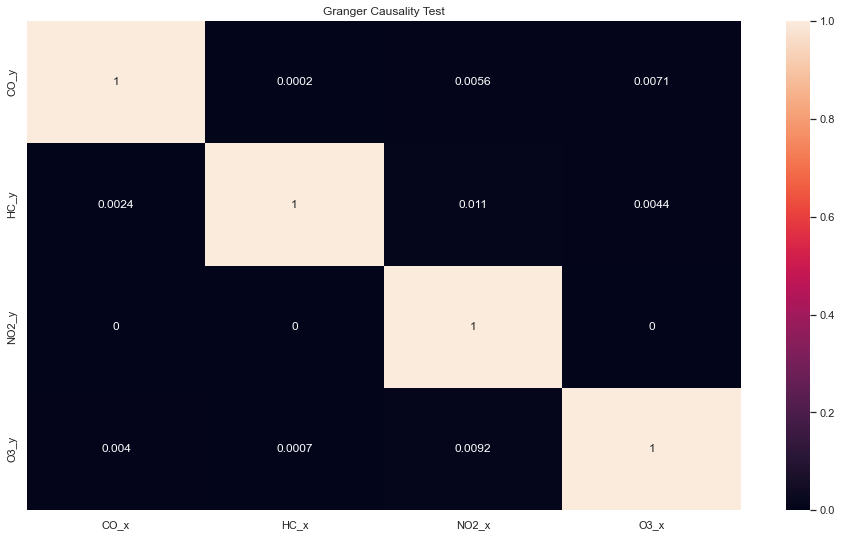

In [20]:
from statsmodels.tsa.stattools import grangercausalitytests
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False , maxlag = 10):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            try:
                
                test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose = False)
                p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
                if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
                min_p_value = np.min(p_values)
                df.loc[r, c] = min_p_value
            except :
                df.loc[r,c] = 'invalid'
           
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df
plt.figure(figsize = (16,9)) 
plt.title('Granger Causality Test')
sns.heatmap(grangers_causation_matrix(cleaned, ['CO' , 'HC' ,'NO2' ,'O3'], test='ssr_chi2test', verbose=False) , annot = True )
plt.show() 

- The granger causality test shows that cointegration existed between the gases as null hypothesis is rejected at significance level of 5%
- Hence, showing that models like `VARMAX` can be used 

In [21]:
cleaned.index = pd.DatetimeIndex(cleaned.index.values,
freq=train.index.inferred_freq)

In [22]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.statespace.structural import UnobservedComponents
from sklearn.base import BaseEstimator, RegressorMixin
import warnings
from sklearn.metrics import mean_squared_error , make_scorer
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error , make_scorer
from statsmodels.tsa.holtwinters import ExponentialSmoothing
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

class HoltWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for arima  """# implemented for hyperparameter tuning with gridsearch cv 
    def __init__(self, period =7):
        self.period = period 
      
    def fit(self, X, y):
        warnings.filterwarnings("ignore")
    
        self.model_ = ExponentialSmoothing(endog = y  , seasonal_periods = self.period )
        self.results_ = self.model_.fit( )
        return self
    def predict(self, X):
        dates = X.index 
        
        return self.results_.predict(start = dates.min() , end = dates.max()  )
class SARIMAXWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for arima  """# implemented for hyperparameter tuning with gridsearch cv 
    def __init__(self, p = 0, d = 0, q =0 , P =0, D =0, Q =0, m =0 , use_exog = True):
        self.p = p 
        self.d =d
        self.q =q
        self.P = P
        self.D =D
        self.Q = Q
        self.m = m
        self.use_exog = use_exog
    def fit(self, X, y):
    #    warnings.filterwarnings("ignore")
    
        self.model_ = SARIMAX( use_exact_diffuse = True  ,endog = y  , exog = X if self.use_exog else None , order = (self.p, self.d, self.q ) , seasonal_order = (self.P, self.D, self.Q, self.m)  )
        self.results_ = self.model_.fit( disp = False)
        return self
    def predict(self, X):
        dates = X.index 
        return self.results_.predict(start = dates.min() , end = dates.max() ,exog = X if self.use_exog else None )
        
        
class ARIMAWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for arima  """# implemented for hyperparameter tuning with gridsearch cv 
    def __init__(self, p = 0, d = 0, q =0 , P =0, D =0, Q =0, m =0 , use_exog = True):
        self.p = p 
        self.d =d
        self.q =q
        self.P = P
        self.D =D
        self.Q = Q
        self.m = m
        self.use_exog = use_exog
    def fit(self, X, y):
        warnings.filterwarnings("ignore")
    
        self.model_ = ARIMA( endog = y  , exog = X if self.use_exog else None , order = (self.p, self.d, self.q ) , seasonal_order = (self.P, self.D, self.Q, self.m)  )
        self.results_ = self.model_.fit(method = 'statespace' )
        return self
    def predict(self, X):
        dates = X.index 
        
        return self.results_.predict(start = dates.min() , end = dates.max() ,exog = X if self.use_exog else None )
class VARMAXWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for varmax  """# implemented for hyperparameter tuning with gridsearch cv 
    def __init__(self, p = 1 , q =1 , trend = 'n'):
        self.p = p 
        self.q =q
        self.trend = trend 
      
    def fit(self, X, y):
        warnings.filterwarnings("ignore")
        self.model_ = VARMAX(endog = y  , exog = X , order = (self.p, self.q ) , trend = self.trend )
        self.results_ = self.model_.fit(disp = False)

        return self
    def predict(self, X):
        dates = X.index 
        
        return self.results_.predict(start = dates.min() , end = dates.max() ,exog = X )

class UnobservedComponentsWrapper(BaseEstimator, RegressorMixin):
    """ A universal sklearn-style wrapper for UnobservedComponents  """# implemented for hyperparameter tuning with gridsearch cv 
    def __init__(self, k =1 , period = 7 , autoregressive = 1 , level  = True , trend = True , irregular = True, \
                 stochastic_level  = True , cycle = False, stochastic_trend = True, stochastic_seasonal = True, stochastic_cycle = True,  damped_cycle = True ):
        self.k = k
        self.period = period
        self.autoregressive = autoregressive
        self.level = level 
        self.trend  = trend 
        self.irregular = irregular 
        self.cycle = cycle
        self.irregular = irregular
        self.stochastic_level = stochastic_level
        self.stochastic_trend = stochastic_trend 
        self.stochastic_seasonal = stochastic_seasonal
        self.stochastic_cycle =  stochastic_cycle
        self.damped_cycle = damped_cycle
        
      
    def fit(self, X, y):
        warnings.filterwarnings("ignore")
       
        self.model_ = UnobservedComponents(endog =y , exog = X,
                               level=self.level, trend=self.trend  , irregular = self.irregular , cycle = self.cycle    , 
                                           autoregressive =self.autoregressive , seasonal = self.period ,
                               stochastic_level =self.stochastic_level  , stochastic_seasonal = self.stochastic_seasonal ,
                               stochastic_cycle=  self.stochastic_cycle , damped_cycle= self.damped_cycle)
        self.results_ = self.model_.fit(disp = False)

        return self
    def predict(self, X):
        dates = X.index 
        
        return self.results_.predict(start = dates.min() , end = dates.max() ,exog = X )

    

def AIC_Scorer(model , x, y):
    return -model.results_.aic 

def BIC_Scorer(model , x, y):
    return -model.results_.bic  

class SimpleTSModel:
    """Simple TS model base class."""
    def __init__(self, y):
        """Determine y data and sampling frequency."""
        if not hasattr(y, 'index'):
            y = pd.Series(y)
        if hasattr(y.index, 'inferred_freq'):
            self.y = y.asfreq(y.index.inferred_freq)
            self.freq = self.y.index.freq
        else:
            self.y = y.copy()
            self.freq = None
        
    def fit(self):
        """Nothing to do here, but in other libraries this is a method that does things."""
        return self

    def forecast(self, dt=None, end=None, periods=None):
        """Make a forward-looking prediction."""
        assert sum([dt is None, end is None, periods is None]) == 2
        tmax = self.y.index.max()
        if dt is not None:
            end = tmax + (pd.to_timedelta(dt) if self.freq else dt)
        elif end is not None:
            end = pd.to_datetime(end) if self.freq else end
        elif periods is not None:
            end = tmax + periods * (self.freq or 1)
        return self.predict(tmax + 1 * (self.freq or 1), end)

    def _normalize_times(self, start, end):
        """Do some tedious datetime manipulation."""
        Y = self.y
        t0 = Y.index.min()
        if start is None:
            start = t0
        if end is None:
            end = Y.index.max()
        if self.freq is not None:
            start = pd.to_datetime(start)
            end = pd.to_datetime(end)
        if self.freq:
            index = pd.date_range(t0, end, freq=self.freq)
        else:
            index = np.arange(t0, end+1)
        return start, end, index     


class TSNaiveSeasonal(SimpleTSModel):
    """Next year will fluctuate the same way as this year."""
    def __init__(self, y, lag):
        super(TSNaiveSeasonal, self).__init__(y)
        self.lag = lag
        assert self.y.index.min() + lag * (self.freq or 1) < self.y.index.max(), \
            'lag must be less than input timeseries'
    
    def predict(self, start=None, end=None):
        # tomorrow probably same as this time last year/month/whatever
        Y, lag = self.y, self.lag
        start, end, index = self._normalize_times(start, end)
        out = pd.Series(np.nan, index=index)
        out.loc[:Y.index.max()] = Y
        out = out.shift(lag)
        i = 0
        while np.isnan(out.iloc[-1]):
            mask = out.isna()
            out[mask] = out.shift(lag)[mask]
            i += 1
        out = out.loc[start:].copy()
        return out.copy()


def gsearch( model  , X , y ,paramgrid  , scoring = rmse , refit = None  , Xcols = None   , cv =TimeSeriesSplit(5) , customparams = False ):
    
    if Xcols is not None: 
        models = {}
        for col in Xcols:
            tuning = GridSearchCV( model ,   
                       paramgrid if not customparams else paramgrid[col]  ,
                      cv =cv,
                      scoring = scoring,
                      verbose = 0,
                      n_jobs = -1 ,
                      refit = refit                      ).fit( y ,X[col] )
           
            models[col] =  tuning
        return models
    
    else:
        tuning = GridSearchCV( model ,   
                       paramgrid ,
                      cv =cv,
                      scoring = scoring,
                      verbose = 0,
                      n_jobs = -1 ,
                      refit = refit 
                     ).fit( y ,X )
       
        return tuning
def test_autocorrelation(fittedmodel):
    pvalue = acorr_breusch_godfrey(fittedmodel , nlags = 7)[1]
    return pvalue , pvalue < 0.05 


## Modelling  / Model Improvement 
- The default parameters set by statsmodels **might not be robust**
- The hyperparameters / orders found from the ACF and PACF graphs serve **as a guideline** and might not have the best performance
- Hence, for modelling I decided to tune the hyperparameters around the range of the hyperparameters / orders found from the ACF/PACF curve for the best hyperparameters for each of the models 
- After tuning, Each model is the 'best version' of itself 
- Each model (with the best hyperparameters )are compared with each other and the model with the lowest RMSE is taken

####  Hyperparameter tuning 
- During tuning I wish to find models that have good performance, but also parameters with more consistent performance
- Hence, for tuning, The mean RMSE will be rounded to the nearest whole number, Out of all the model with the best mean rmse, the model with the lowest standard deviation of the rmse will be taken 



####  TimeSeriesSplit
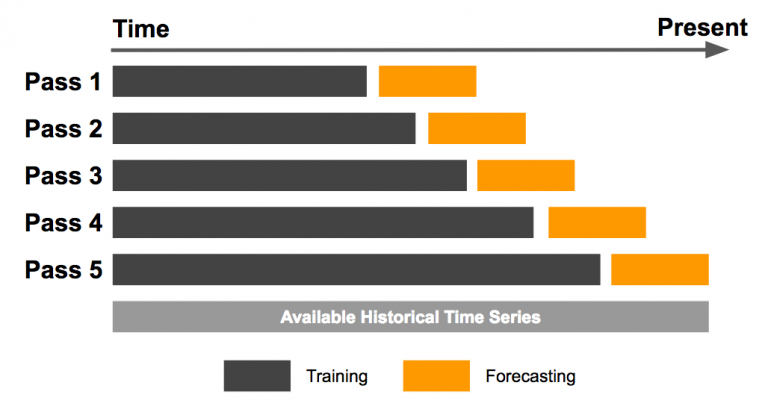
- The default `KFold` cross validation cannot be used for the task as randomised splits will return biased results
- Using expanding window cross validation with `TimeSeriesSplit()`  from `sklearn` to find the best hyperparameter of each model 

####  Root Mean Squared Error
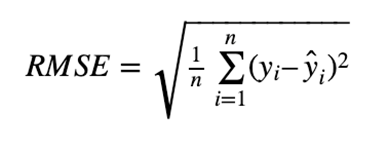
- Using the main metric of `RMSE`, which penalises large errors and hence, using `RMSE` decreases the change of finding models that predicts with large errors


####  Statistical Tests in the AutoCorrelation of Residuals
- Durbin Watson is a test for autocorrelation in residuals  but only for lag 1 hence, we will not use it as we want to determine if the weekly seasonality can be captured by the model ,i.e we want to test the lags of the model up to and including 7  
- Other possible tests are ljung box and brush godfrey test
- [brush godfrey test](https://stats.stackexchange.com/questions/148004/testing-for-autocorrelation-ljung-box-versus-breusch-godfrey) is better than than ljung box (espescially for models with  autoregressive components) as its test statistic the uncentered R2 has an asymptotic chi-square distribution under the null
- However,  the brush godfrey test does not work for models that accept multiple endogenous variables like varmax
- Hence, the brush godfrey test will be used for ARIMA, ARIMAX, SARIMAX , Unobserved Components  
- the ljung box will be used for   VMA and VAR
- 7 chosen for lag of all tests




> Models to test
>- ARIMA 
>- ARIMAX 
>- SARIMAX
>- Unobserved Components
>- VAR 
>- VMA 


In [23]:
def best_model(grid ,base , x,y ):
    models = defaultdict(dict)
    for gas in ['CO' , 'HC' ,'NO2' ,'O3']:
        print(gas)
        top10 = pd.DataFrame(grid[gas].cv_results_)\
        .assign(mean_test_RMSE =pd.DataFrame(grid[gas].cv_results_).mean_test_RMSE.round(0) )\
        [['params' , 'mean_test_RMSE' , 'std_test_RMSE']].sort_values(['mean_test_RMSE' , 'std_test_RMSE' ] , ascending=[False , True])[:5].reset_index(drop= True )
        display(top10)
        print(top10.loc[ 0, 'params'])
        model = base(**top10.loc[ 0, 'params']).fit( x, y[gas] )
        models[gas]['model']= model
        models[gas]['meanrmse']= top10.loc[ 0 , 'mean_test_RMSE']
        models[gas]['stdrmse']= top10.loc[ 0, 'std_test_RMSE']
    return models 
def best_model_mul(grid ,base , x,y ):
    models = defaultdict(dict)
    top10 = pd.DataFrame(grid.cv_results_)\
    .assign(mean_test_RMSE =pd.DataFrame(grid.cv_results_).mean_test_RMSE.round(0) )\
    [['params' , 'mean_test_RMSE' , 'std_test_RMSE']].sort_values(['mean_test_RMSE' , 'std_test_RMSE' ] , ascending=[False , True])[:5].reset_index(drop= True )
    display(top10)
    print(top10.loc[ 0, 'params'])
    model = base(**top10.loc[ 0, 'params']).fit( x, y )
    
    return model


In [24]:
training= cleaned[:int(0.8 * len(cleaned))]
testing = cleaned[int(0.8 * len(cleaned)): ]



### Holt's Exponential Smoothing Model 

- A simple / naive model that uses the Exponential Smoothing for forcasting
- Used as a **baseline**, to determine whether the more advanced models (ARIMA/SARIMA ... ) below is perform better than this naive forcasting method 

In [25]:
from collections import defaultdict
rmseresults = defaultdict(dict) # to collect the rmse of all models and gases
statisticaltestresults = defaultdict(dict)
stdrmseresults = defaultdict(dict)

In [26]:
holtgrids  = gsearch( HoltWrapper()  , #cross validation rmse of the model
        training,
        training[['T' , 'RH','dewpt' , 'isweekend']], # HOLT exponantial smoothing actually does not use the exogenous variables, it is simply ignored interally 
        dict(period = [7]),
        refit = 'RMSE' , 
        scoring = {'RMSE': rmse, 'AIC' : AIC_Scorer , 'BIC' : BIC_Scorer},
                      
        Xcols = ['CO' , 'HC' , 'NO2' , 'O3']   )
holtmodels = best_model(holtgrids ,HoltWrapper, training[['T' , 'RH','dewpt' , 'isweekend']]  , training[['CO' , 'HC' , 'NO2' , 'O3']] )

CO


params  mean_test_RMSE  std_test_RMSE
0  {'period': 7}          -136.0      36.044473

{'period': 7}
HC


params  mean_test_RMSE  std_test_RMSE
0  {'period': 7}          -163.0      49.594721

{'period': 7}
NO2


params  mean_test_RMSE  std_test_RMSE
0  {'period': 7}          -161.0      46.826625

{'period': 7}
O3


params  mean_test_RMSE  std_test_RMSE
0  {'period': 7}          -279.0      98.037971

{'period': 7}


In [30]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
from statsmodels.stats.diagnostic import acorr_ljungbox
def ljungbox(resids):
    pvalue = acorr_ljungbox(resids ,  lags = [7]).loc[7 , 'lb_pvalue']
    return pvalue , pvalue < 0.05 
for gas, estimator in holtmodels.items():
    print('Gas' , gas)
    plt.show()
    pvalue , autocorrelation = ljungbox(estimator['model'].results_.resid)
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals' )
    print('p value is ' , pvalue)
    rmseresults['Holt Exponential Smoothing'][gas] = estimator['meanrmse'] 
    statisticaltestresults['Holt Exponential Smoothing'][gas] = autocorrelation
    stdrmseresults['Holt Exponential Smoothing'][gas] =  estimator['stdrmse'] 
    

Gas CO
There is presense of autocorrelation in residuals
p value is  1.4586858644452122e-07
Gas HC
There is presense of autocorrelation in residuals
p value is  4.1921105112028845e-19
Gas NO2
There is presense of autocorrelation in residuals
p value is  7.247025569003035e-11
Gas O3
There is presense of autocorrelation in residuals
p value is  2.2352726936954184e-12


- Generally has a high mean rmse
- Significant auto correlations exists residuals for  all gases

#### AutoRegressive Integrated Moving Average (ARIMA) Model

- It has 3 main componenents 

>  AutoRegressive AR(p)
- Uses the linear combinations of the lagged variable to forcast the current variable. 
- e.g using the gas concentration values for the past few days to forcast the gas value today
- p is the order of the AR componenent which is the number of lags to include in the model 
- Tested in the range of 0 to 5 which includes the lags identified in the pacf

> Integrated(d)
- To difference the data if data is non stationary 
- Set to 0 for this dataset as gas data is stationsary according to ADF test above

> Moving Average (q) 
- Uses the past forecast errors
- q is the number of past error terms to use
- Tested in the range of 0 to 5 which includes the lags identified in the acf


In [28]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arimagrids  = gsearch( ARIMAWrapper()  ,
            training,
            training[['T' , 'RH','dewpt' , 'isweekend']],
            dict(d = [0] , p = range(0, 5)  , q = range(0,5) , use_exog = [False]),
            refit = 'RMSE' , 
            scoring = {'RMSE': rmse, 'AIC' : AIC_Scorer , 'BIC' : BIC_Scorer},

            Xcols = ['CO' , 'HC' , 'NO2' , 'O3']   )
arimamodels = best_model(arimagrids ,ARIMAWrapper, training[['T' , 'RH','dewpt' , 'isweekend']]  , training[['CO' , 'HC' , 'NO2' , 'O3']] )

CO


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 2, 'q': 4, 'use_exog': False}          -109.0      27.242680
1  {'d': 0, 'p': 4, 'q': 1, 'use_exog': False}          -109.0      27.521736
2  {'d': 0, 'p': 1, 'q': 3, 'use_exog': False}          -110.0      25.347735
3  {'d': 0, 'p': 2, 'q': 3, 'use_exog': False}          -110.0      25.417304
4  {'d': 0, 'p': 1, 'q': 4, 'use_exog': False}          -110.0      26.092915

{'d': 0, 'p': 2, 'q': 4, 'use_exog': False}
HC


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 3, 'q': 3, 'use_exog': False}          -101.0      27.599616
1  {'d': 0, 'p': 4, 'q': 3, 'use_exog': False}          -101.0      28.677609
2  {'d': 0, 'p': 3, 'q': 4, 'use_exog': False}          -102.0      27.530027
3  {'d': 0, 'p': 2, 'q': 4, 'use_exog': False}          -106.0      24.934681
4  {'d': 0, 'p': 4, 'q': 4, 'use_exog': False}          -106.0      29.360567

{'d': 0, 'p': 3, 'q': 3, 'use_exog': False}
NO2


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 3, 'q': 4, 'use_exog': False}          -122.0      30.169622
1  {'d': 0, 'p': 2, 'q': 4, 'use_exog': False}          -123.0      26.803312
2  {'d': 0, 'p': 1, 'q': 3, 'use_exog': False}          -123.0      26.974663
3  {'d': 0, 'p': 4, 'q': 2, 'use_exog': False}          -124.0      26.357600
4  {'d': 0, 'p': 1, 'q': 4, 'use_exog': False}          -124.0      26.833938

{'d': 0, 'p': 3, 'q': 4, 'use_exog': False}
O3


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 3, 'q': 3, 'use_exog': False}          -184.0      50.421680
1  {'d': 0, 'p': 3, 'q': 4, 'use_exog': False}          -185.0      50.709823
2  {'d': 0, 'p': 2, 'q': 4, 'use_exog': False}          -185.0      52.717349
3  {'d': 0, 'p': 4, 'q': 4, 'use_exog': False}          -186.0      49.309617
4  {'d': 0, 'p': 4, 'q': 3, 'use_exog': False}          -188.0      47.843919

{'d': 0, 'p': 3, 'q': 3, 'use_exog': False}


- The Hyperparameter found p and q values that are larger than those identified in the pacf and acf graphs 
- Performs better than the baseline

Gas CO


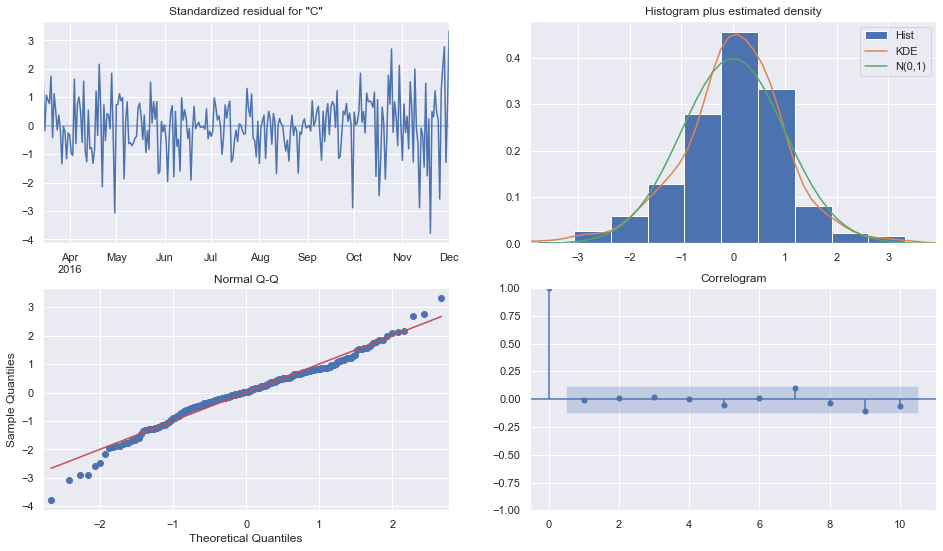

There is absense of autocorrelation in residuals
p value is  0.7533588051561865
Gas HC


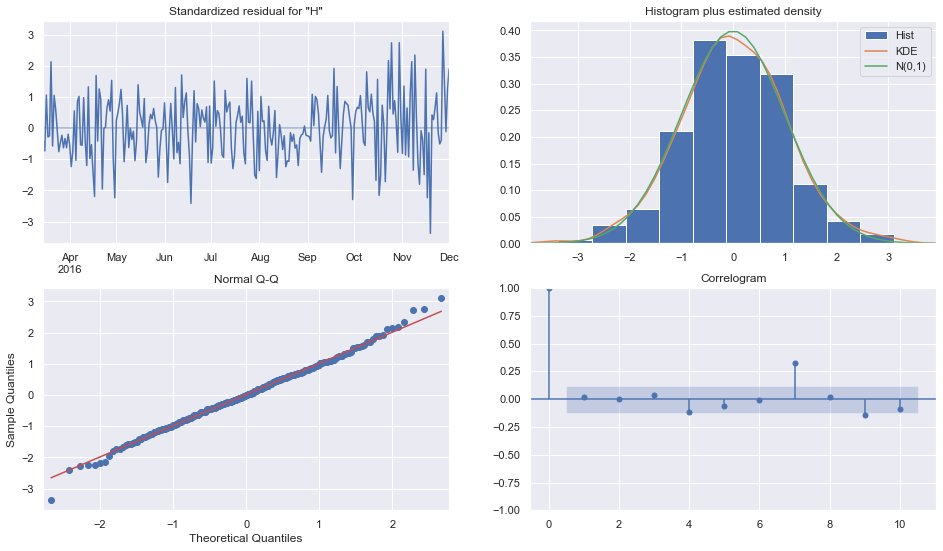

There is presense of autocorrelation in residuals
p value is  5.034052272736981e-06
Gas NO2


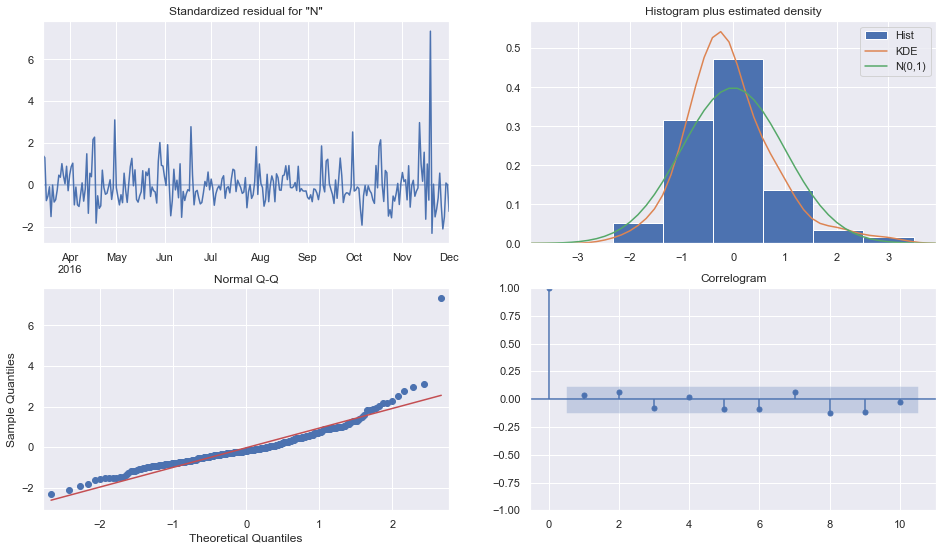

There is absense of autocorrelation in residuals
p value is  0.260657288122519
Gas O3


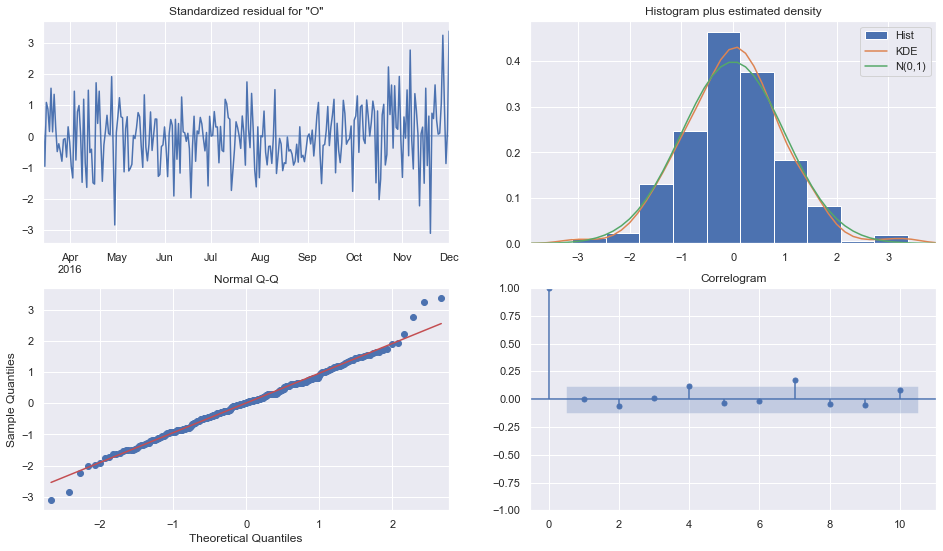

There is absense of autocorrelation in residuals
p value is  0.07033279023988773


In [29]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
for gas, estimator in arimamodels.items():
    print('Gas' , gas)
    estimator['model'].results_.plot_diagnostics(figsize = (16,9))
    plt.show()
    pvalue , autocorrelation = test_autocorrelation(estimator['model'].results_)
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals' )
    print('p value is ' , pvalue)
    rmseresults['ARIMA'][gas] = estimator['meanrmse'] 
    statisticaltestresults['ARIMA'][gas] = autocorrelation
    stdrmseresults['ARIMA'][gas] =  estimator['stdrmse']

- Significant lags exist at lag 7 for all gases
- Shows that ARIMA is not a suitable model

### AutoRegressive Integrated Moving Average (ARIMA)  with Exogenous Variables

- Contains the AR , I and MA componenents + uses the exogenous variables temperature and relative humidity to estimate the gas values in a regression like manner

In [30]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    arimaxgrids  = gsearch( ARIMAWrapper()  ,
            training,
            training[['T' , 'RH'   , 'dewpt', 'isweekend' ]],
                           
            dict(d = [0] , p = range(0, 5)  , q = range(0, 5)),
            refit = 'RMSE' , 
            scoring = {'RMSE': rmse, 'AIC' : AIC_Scorer , 'BIC' : BIC_Scorer},

            Xcols = ['CO' , 'HC' , 'NO2' , 'O3']   )
arimaxmodels = best_model(arimaxgrids ,ARIMAWrapper, training[['T' , 'RH','dewpt' , 'isweekend']]  , training[['CO' , 'HC' , 'NO2' , 'O3']] )

CO


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 0, 'q': 2}          -105.0      16.951939
1  {'d': 0, 'p': 0, 'q': 1}          -106.0      18.688146
2  {'d': 0, 'p': 0, 'q': 4}          -109.0      19.960450
3  {'d': 0, 'p': 0, 'q': 3}          -109.0      21.607739
4  {'d': 0, 'p': 0, 'q': 0}          -110.0      25.329619

{'d': 0, 'p': 0, 'q': 2}
HC


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 2, 'q': 4}          -112.0      26.192252
1  {'d': 0, 'p': 2, 'q': 1}          -112.0      31.001213
2  {'d': 0, 'p': 0, 'q': 1}          -113.0      26.204335
3  {'d': 0, 'p': 0, 'q': 4}          -113.0      31.113269
4  {'d': 0, 'p': 2, 'q': 0}          -114.0      28.598062

{'d': 0, 'p': 2, 'q': 4}
NO2


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 3, 'q': 4}          -112.0      35.988002
1  {'d': 0, 'p': 2, 'q': 4}          -113.0      35.987759
2  {'d': 0, 'p': 1, 'q': 4}          -114.0      35.919474
3  {'d': 0, 'p': 4, 'q': 2}          -115.0      38.172872
4  {'d': 0, 'p': 0, 'q': 3}          -115.0      41.109451

{'d': 0, 'p': 3, 'q': 4}
O3


params  mean_test_RMSE  std_test_RMSE
0  {'d': 0, 'p': 2, 'q': 0}          -202.0      41.588428
1  {'d': 0, 'p': 0, 'q': 1}          -203.0      33.163496
2  {'d': 0, 'p': 0, 'q': 2}          -204.0      38.110880
3  {'d': 0, 'p': 2, 'q': 1}          -204.0      42.859274
4  {'d': 0, 'p': 0, 'q': 4}          -206.0      37.926789

{'d': 0, 'p': 2, 'q': 0}


Gas CO


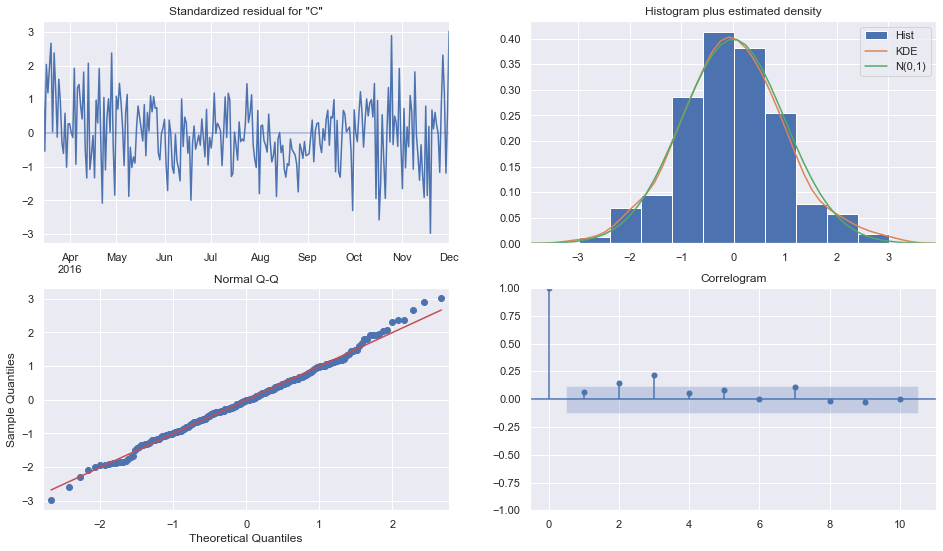

There is presense of autocorrelation in residuals
p value is  0.00014334604878679191
Gas HC


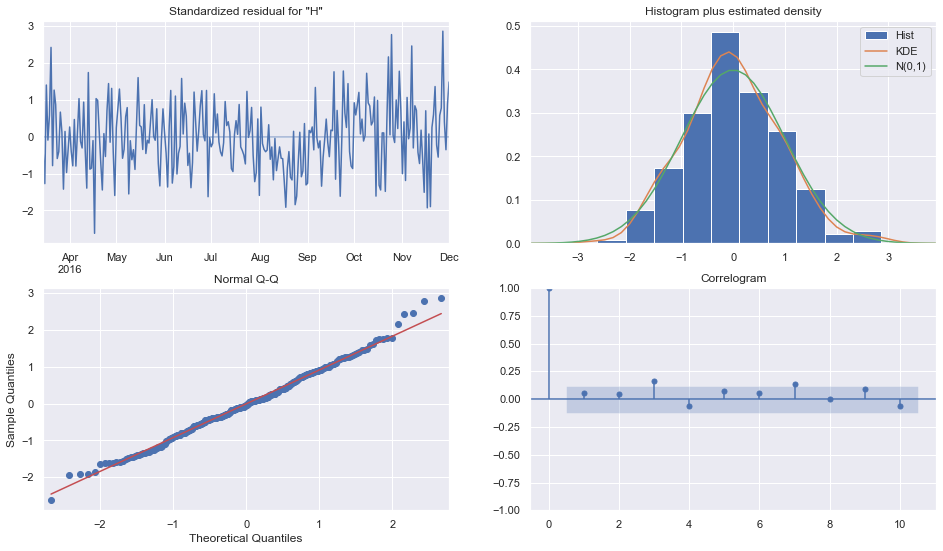

There is presense of autocorrelation in residuals
p value is  0.00030865264471793293
Gas NO2


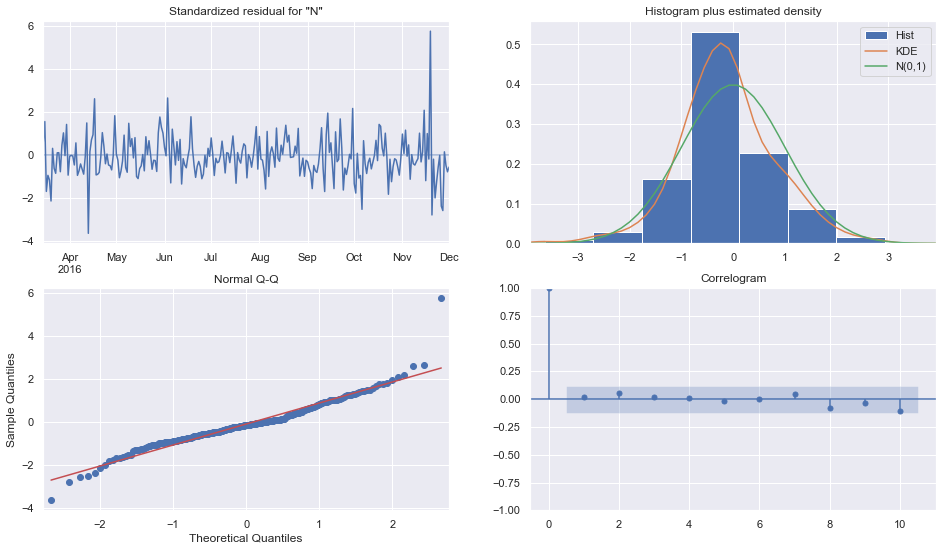

There is absense of autocorrelation in residuals
p value is  0.12301949433700107
Gas O3


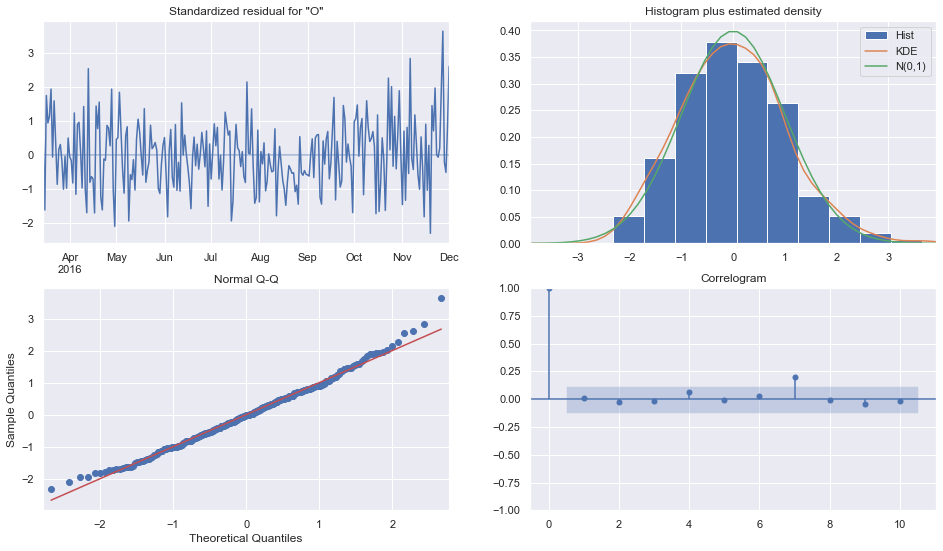

There is presense of autocorrelation in residuals
p value is  0.0019849694114054757


In [31]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
for gas, estimator in arimaxmodels.items():
    print('Gas' , gas)
    estimator['model'].results_.plot_diagnostics(figsize = (16,9))
    plt.show()
    pvalue , autocorrelation = test_autocorrelation(estimator['model'].results_)
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals' )
    print('p value is ' , pvalue)    
    rmseresults['ARIMAX'][gas] = estimator['meanrmse'] 
    statisticaltestresults['ARIMAX'][gas] = autocorrelation
    stdrmseresults['ARIMAX'][gas] =  estimator['stdrmse']

- For NO2 , HC and O3  there is a significant lag at 7, which shows that ARIMAX unable to capture the weekly seasonality
- Hence we will use ARIMA with Seasonality which is SARIMAX/SARIMA

### Seasonal AutoRegressive Integrated Moving Average 
- Contains the same componenets `AR(p)` , `I` and `MA(q)` as  ARIMA
- Contains extra hyperparameters which are:

> P : Order of seasonal autoregressive componenent

> D : Order of seasonal differencing 

> Q : Order of seasonal moving average componenent 

> m : period of seasonality  (fixed to 7 for this dataset as shown by the lags of ARIMA model)



In [32]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    sariamaxgrids = gsearch( SARIMAXWrapper()  ,
            training.astype('float64'),
            training[['T' , 'RH','dewpt' , 'isweekend']].astype('float64'),
            paramgrid = dict(d = [0] , p = range(0,5 ) , q = range(5)  , D = [0] , P = range(4), Q = range(4) , m =[7]),
            refit = 'RMSE' , 
            scoring = {'RMSE': rmse, 'AIC' : AIC_Scorer , 'BIC' : BIC_Scorer} ,               
            Xcols =  ['CO' , 'HC' , 'NO2' , 'O3'] , customparams = False  )
sarimaxmodels = best_model(sariamaxgrids ,SARIMAXWrapper, training[['T' , 'RH','dewpt' , 'isweekend']]  , training[['CO' , 'HC' , 'NO2' , 'O3']] )

CO


params  mean_test_RMSE  \
0  {'D': 0, 'P': 3, 'Q': 2, 'd': 0, 'm': 7, 'p': ...          -107.0   
1  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -114.0   
2  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -116.0   
3  {'D': 0, 'P': 2, 'Q': 3, 'd': 0, 'm': 7, 'p': ...          -116.0   
4  {'D': 0, 'P': 3, 'Q': 2, 'd': 0, 'm': 7, 'p': ...          -116.0   

   std_test_RMSE  
0      47.428945  
1      42.347770  
2      31.496711  
3      41.549555  
4      45.672737

{'D': 0, 'P': 3, 'Q': 2, 'd': 0, 'm': 7, 'p': 1, 'q': 2}
HC


params  mean_test_RMSE  \
0  {'D': 0, 'P': 3, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -109.0   
1  {'D': 0, 'P': 1, 'Q': 1, 'd': 0, 'm': 7, 'p': ...          -110.0   
2  {'D': 0, 'P': 3, 'Q': 2, 'd': 0, 'm': 7, 'p': ...          -111.0   
3  {'D': 0, 'P': 3, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -111.0   
4  {'D': 0, 'P': 3, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -111.0   

   std_test_RMSE  
0      22.541993  
1      27.752111  
2      20.445326  
3      21.998195  
4      22.152850

{'D': 0, 'P': 3, 'Q': 0, 'd': 0, 'm': 7, 'p': 3, 'q': 4}
NO2


params  mean_test_RMSE  \
0  {'D': 0, 'P': 1, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -109.0   
1  {'D': 0, 'P': 0, 'Q': 1, 'd': 0, 'm': 7, 'p': ...          -110.0   
2  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -110.0   
3  {'D': 0, 'P': 1, 'Q': 2, 'd': 0, 'm': 7, 'p': ...          -111.0   
4  {'D': 0, 'P': 3, 'Q': 1, 'd': 0, 'm': 7, 'p': ...          -112.0   

   std_test_RMSE  
0      25.599462  
1      26.282875  
2      27.426258  
3      24.876010  
4      25.891266

{'D': 0, 'P': 1, 'Q': 0, 'd': 0, 'm': 7, 'p': 1, 'q': 3}
O3


params  mean_test_RMSE  \
0  {'D': 0, 'P': 3, 'Q': 3, 'd': 0, 'm': 7, 'p': ...          -203.0   
1  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -204.0   
2  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -205.0   
3  {'D': 0, 'P': 0, 'Q': 0, 'd': 0, 'm': 7, 'p': ...          -206.0   
4  {'D': 0, 'P': 3, 'Q': 3, 'd': 0, 'm': 7, 'p': ...          -207.0   

   std_test_RMSE  
0      46.985106  
1      39.351948  
2      41.121210  
3      42.000148  
4      33.538281

{'D': 0, 'P': 3, 'Q': 3, 'd': 0, 'm': 7, 'p': 4, 'q': 2}


Gas CO


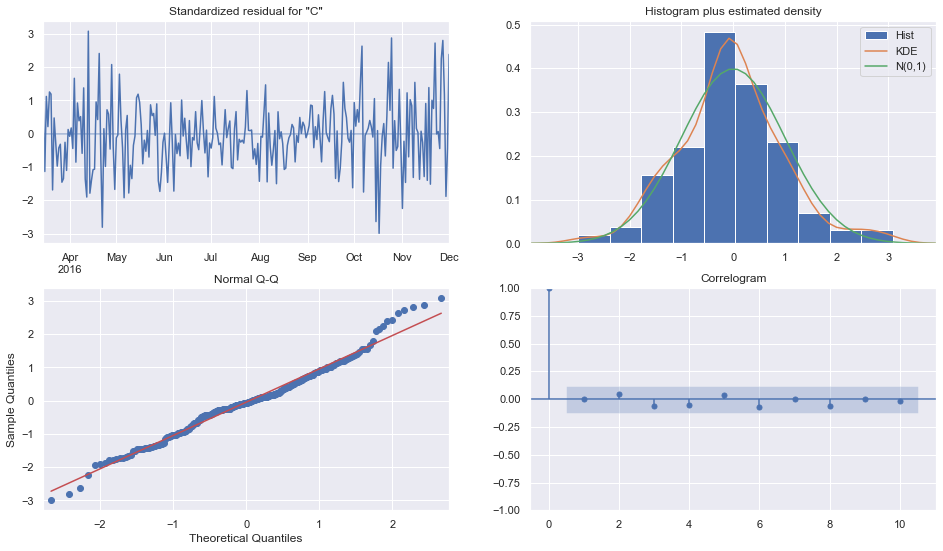

There is presense of autocorrelation in residuals
p value is  0.034396305263355055
Gas HC


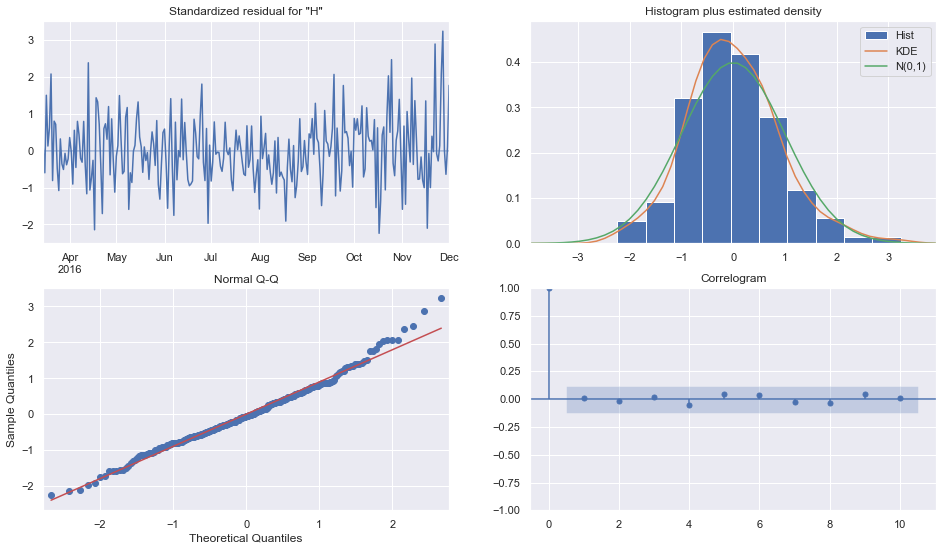

There is presense of autocorrelation in residuals
p value is  0.011313311419877254
Gas NO2


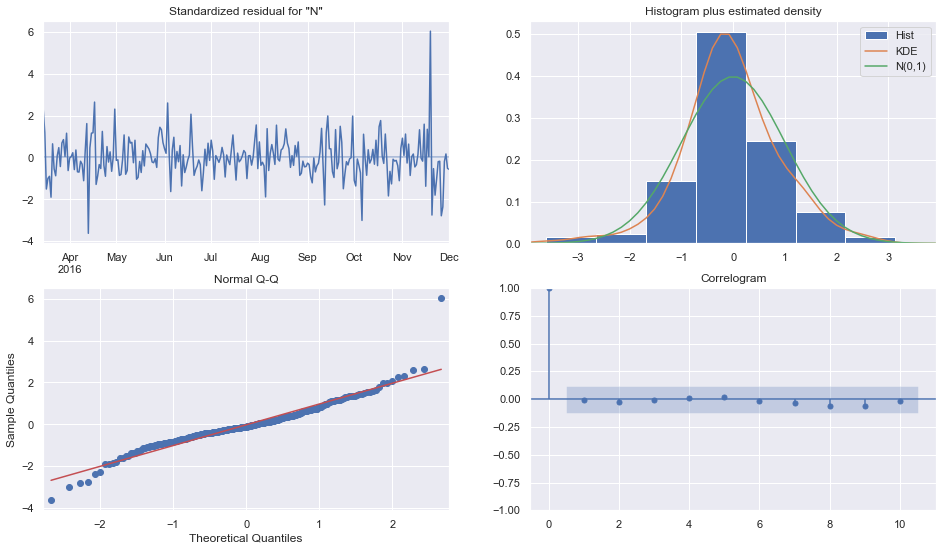

There is absense of autocorrelation in residuals
p value is  0.49276336533768084
Gas O3


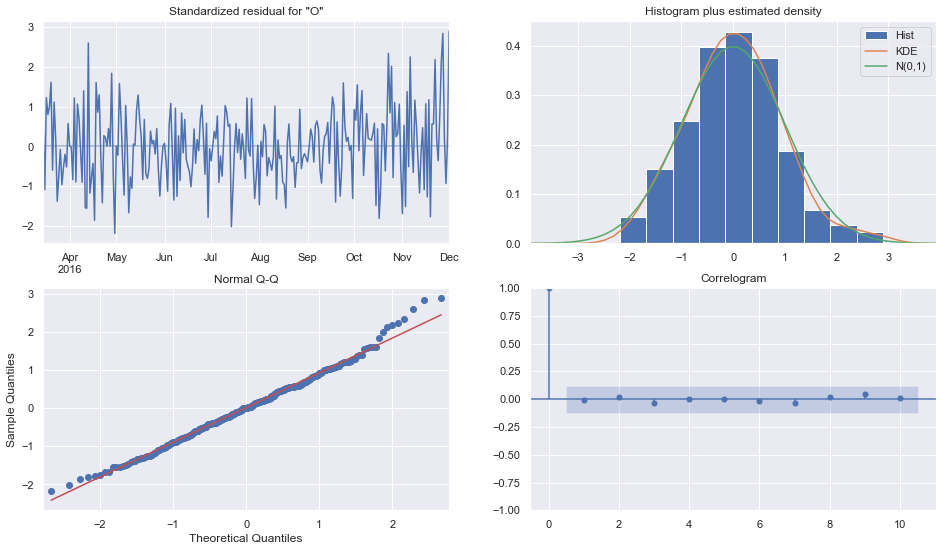

There is absense of autocorrelation in residuals
p value is  0.17029123279426922


In [33]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

for gas, estimator in sarimaxmodels.items():
    print('Gas' , gas)
    estimator['model'].results_.plot_diagnostics(figsize = (16,9))
    plt.show()
    pvalue , autocorrelation = test_autocorrelation(estimator['model'].results_)
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals' )
    print('p value is ' , pvalue)
    rmseresults['SARIMAX'][gas] = estimator['meanrmse'] 
    statisticaltestresults['SARIMAX'][gas] = autocorrelation
    stdrmseresults['SARIMAX'][gas] =  estimator['stdrmse']

- The Correlogram for SARIMAX looks like there are no significant autocorrelation in the residuals in all 4 gases
- however the `breusch_godfrey` identifies significant lags in CO  and HC

### Unobserved Componenents Model 
Unobserved compoenents decomposes the time series in the several components below:
> Autoregressive Term  MA(q)

> Trend 

> Autoregressive 

> Seasonal

- It is an alternative to SARIMAX which finds seasonality


In [34]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    ucmgrids  = gsearch( UnobservedComponentsWrapper()  ,
            training,
            training[['T' , 'RH','dewpt' , 'isweekend']],
            dict(period =  [ 7]  , autoregressive = range(1,7) ,level = [True] , trend = [True] , stochastic_cycle = [False] , 
               cycle = [False ] , damped_cycle = [False]    ,
                 stochastic_level = [ False] ,stochastic_seasonal = [True] , stochastic_trend = [False] ),
            refit = 'RMSE' , 
            scoring = {'RMSE': rmse, 'AIC' : AIC_Scorer , 'BIC' : BIC_Scorer}  ,
            Xcols = ['CO' , 'HC' , 'NO2' , 'O3']   )
    
ucmmodels = best_model(ucmgrids ,UnobservedComponentsWrapper, training[['T' , 'RH','dewpt' , 'isweekend']]  , training[['CO' , 'HC' , 'NO2' , 'O3']] )

CO


params  mean_test_RMSE  \
0  {'autoregressive': 6, 'cycle': False, 'damped_...          -131.0   
1  {'autoregressive': 4, 'cycle': False, 'damped_...          -137.0   
2  {'autoregressive': 3, 'cycle': False, 'damped_...          -140.0   
3  {'autoregressive': 2, 'cycle': False, 'damped_...          -143.0   
4  {'autoregressive': 5, 'cycle': False, 'damped_...          -146.0   

   std_test_RMSE  
0      59.984244  
1      56.179333  
2      53.421035  
3      76.263987  
4      70.716639

{'autoregressive': 6, 'cycle': False, 'damped_cycle': False, 'level': True, 'period': 7, 'stochastic_cycle': False, 'stochastic_level': False, 'stochastic_seasonal': True, 'stochastic_trend': False, 'trend': True}
HC


params  mean_test_RMSE  \
0  {'autoregressive': 3, 'cycle': False, 'damped_...          -112.0   
1  {'autoregressive': 4, 'cycle': False, 'damped_...          -112.0   
2  {'autoregressive': 5, 'cycle': False, 'damped_...          -126.0   
3  {'autoregressive': 2, 'cycle': False, 'damped_...          -131.0   
4  {'autoregressive': 1, 'cycle': False, 'damped_...          -131.0   

   std_test_RMSE  
0      52.174230  
1      53.222252  
2      63.544953  
3      75.130392  
4      75.667720

{'autoregressive': 3, 'cycle': False, 'damped_cycle': False, 'level': True, 'period': 7, 'stochastic_cycle': False, 'stochastic_level': False, 'stochastic_seasonal': True, 'stochastic_trend': False, 'trend': True}
NO2


params  mean_test_RMSE  \
0  {'autoregressive': 2, 'cycle': False, 'damped_...          -111.0   
1  {'autoregressive': 1, 'cycle': False, 'damped_...          -111.0   
2  {'autoregressive': 3, 'cycle': False, 'damped_...          -119.0   
3  {'autoregressive': 4, 'cycle': False, 'damped_...          -128.0   
4  {'autoregressive': 5, 'cycle': False, 'damped_...          -129.0   

   std_test_RMSE  
0      24.202100  
1      24.549677  
2      28.289812  
3      29.774741  
4      13.251735

{'autoregressive': 2, 'cycle': False, 'damped_cycle': False, 'level': True, 'period': 7, 'stochastic_cycle': False, 'stochastic_level': False, 'stochastic_seasonal': True, 'stochastic_trend': False, 'trend': True}
O3


params  mean_test_RMSE  \
0  {'autoregressive': 3, 'cycle': False, 'damped_...          -239.0   
1  {'autoregressive': 1, 'cycle': False, 'damped_...          -243.0   
2  {'autoregressive': 2, 'cycle': False, 'damped_...          -249.0   
3  {'autoregressive': 5, 'cycle': False, 'damped_...          -250.0   
4  {'autoregressive': 4, 'cycle': False, 'damped_...          -255.0   

   std_test_RMSE  
0     139.389217  
1     144.558733  
2     150.954198  
3     111.962202  
4     126.661175

{'autoregressive': 3, 'cycle': False, 'damped_cycle': False, 'level': True, 'period': 7, 'stochastic_cycle': False, 'stochastic_level': False, 'stochastic_seasonal': True, 'stochastic_trend': False, 'trend': True}


Gas CO


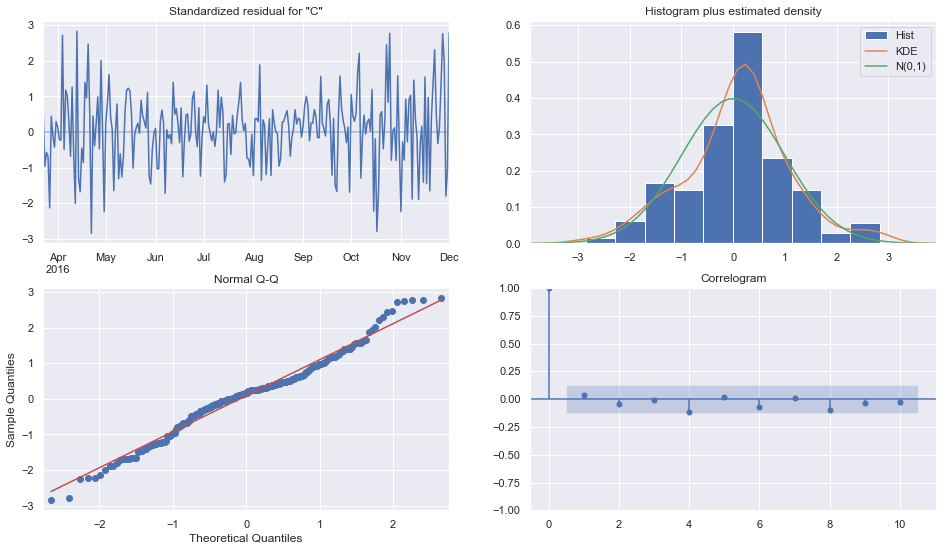

There is presense of autocorrelation in residuals
p value is  5.325882187614655e-07
Gas HC


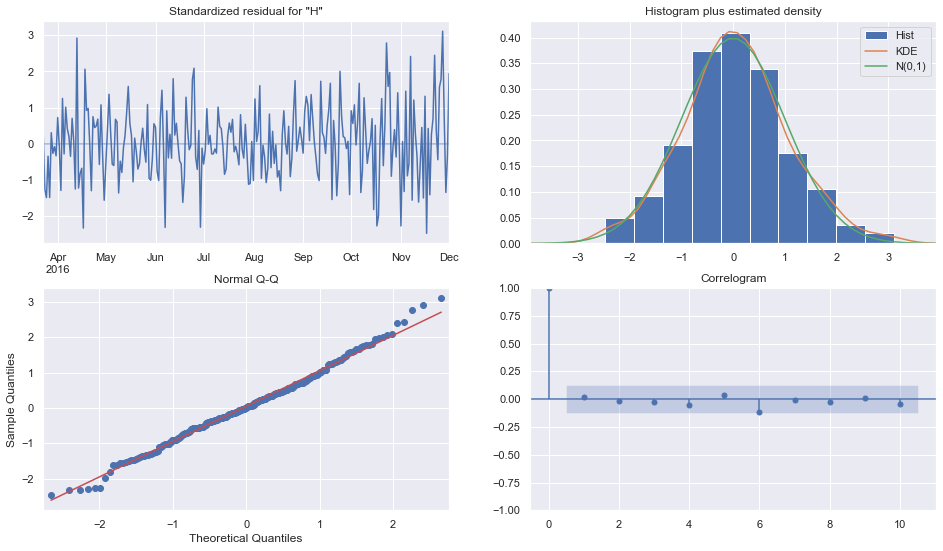

There is presense of autocorrelation in residuals
p value is  0.0014374638685640323
Gas NO2


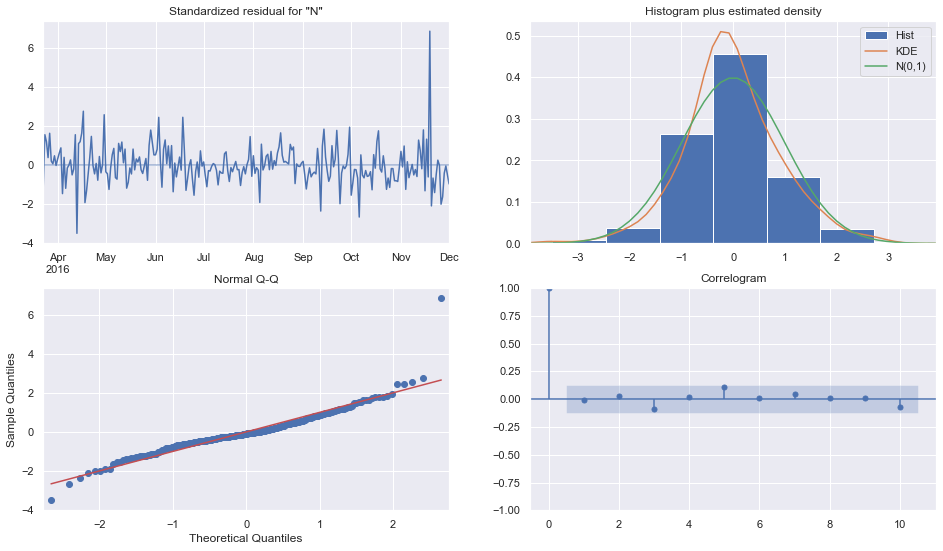

There is presense of autocorrelation in residuals
p value is  7.369076754338216e-13
Gas O3


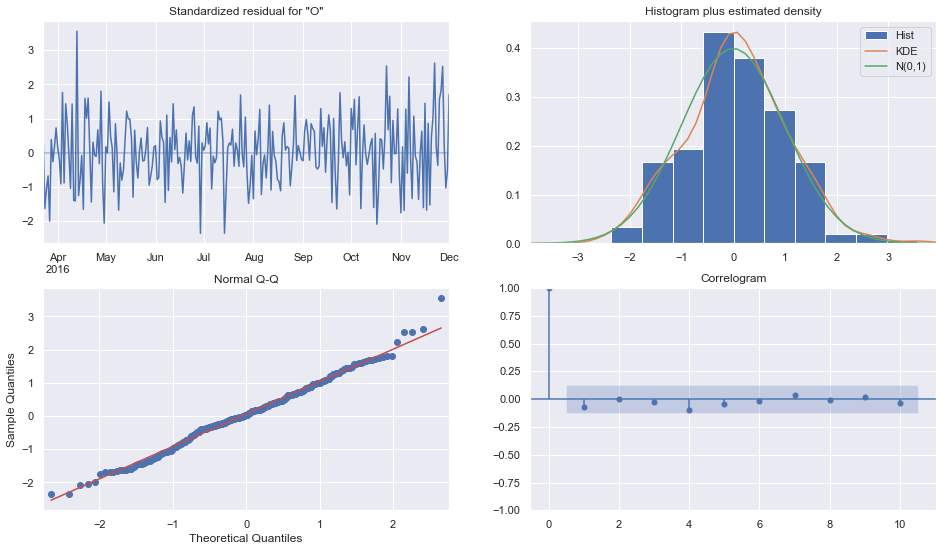

There is presense of autocorrelation in residuals
p value is  0.026202097114808878


In [35]:
from statsmodels.stats.diagnostic import acorr_breusch_godfrey
def test_autocorrelation(fittedmodel):
    pvalue = acorr_breusch_godfrey(fittedmodel, nlags=7)[1]
    return pvalue , pvalue < 0.05 

def ljungbox(resids):
    pvalue = acorr_ljungbox(resids ,  lags = [7]).loc[7 , 'lb_pvalue']
    return pvalue , pvalue < 0.05 
for gas, estimator in ucmmodels.items():
    print('Gas' , gas)
    estimator['model'].results_.plot_diagnostics(figsize = (16,9))
    plt.show()
    pvalue , autocorrelation = test_autocorrelation(estimator['model'].results_)
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals' )
    print('p value is ' , pvalue)
    rmseresults['Unobserved Components'][gas] = estimator['meanrmse'] 
    statisticaltestresults['Unobserved Components'][gas] = autocorrelation
    stdrmseresults['Unobserved Components'][gas] =  estimator['stdrmse']

- Looks like there are no Significant lags in the correlogram but for all gases
- however the `breusch_godfrey` identifies significant lags in all the gases
- Hence, Unobserved Components will not be used

In [36]:
from sklearn.metrics import mean_squared_error , make_scorer
def co_scorer(ytrue, ypred):
    print('ytrue' , ytrue)
    print('ypred' , ypred)
    y = ytrue['CO']
    yhat = ypred['CO']
    return mean_squared_error(y, yhat , squared =  False)
def hc_scorer(ytrue, ypred):
    y = ytrue['HC']
    yhat = ypred['HC']
    return mean_squared_error(y, yhat , squared =  False)
def no2_scorer(ytrue, ypred):
    y = ytrue['NO2']
    yhat = ypred['NO2']
    return mean_squared_error(y, yhat , squared =  False)
def o3_scorer(ytrue, ypred):
    y = ytrue['O3']
    yhat = ypred['O3']
    return mean_squared_error(y, yhat , squared =  False)
scorers   = dict(CO = make_scorer(co_scorer) , HC = make_scorer(hc_scorer), NO2 =  make_scorer(no2_scorer) , O3 =make_scorer(o3_scorer) )


## Vector Auto Regression / Vector Moving Average models 

- VAR models are  models that are able to use multiple endogenous variables for forecasting 
- An increase/decrease in levels of one gas may also lead to increase/decrease in levels of another gas as they participate in chemical reactions that either consumes them or produces them
- Statsmodels provides the `VARMAX` class for these variables , which as hyperparameters `p` and `q`
- According to the statsmodel documentation , the `VARMA(p,q)` is generally not robust, hence I will try `VMAX(p)` and `VMA(q)`

### Vector Auto Regression 

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error , make_scorer
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

var= GridSearchCV( VARMAXWrapper() ,   
                      dict(p = range(1,7)  , q =  [0] , trend = ['n' , 'c' , 't' ,'ct']) ,
                      cv = TimeSeriesSplit(5), 
                      scoring = {'RMSE' :rmse},
                      refit = 'RMSE' , 
                      verbose = 0,
                      n_jobs = -1 
                     ).fit( training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']] )

bestvar = best_model_mul(var,VARMAXWrapper , training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']]  )


params  mean_test_RMSE  std_test_RMSE
0  {'p': 2, 'q': 0, 'trend': 'c'}          -133.0      25.370120
1  {'p': 1, 'q': 0, 'trend': 'c'}          -134.0      28.214994
2  {'p': 2, 'q': 0, 'trend': 'n'}          -134.0      32.365056
3  {'p': 5, 'q': 0, 'trend': 'n'}          -135.0      29.254798
4  {'p': 1, 'q': 0, 'trend': 'n'}          -136.0      34.084985

{'p': 2, 'q': 0, 'trend': 'c'}


In [38]:
from sklearn.model_selection import cross_val_score , cross_validate

varrmse= cross_validate(bestvar ,training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']]  , 
                scoring =  scorers , 
               cv = TimeSeriesSplit(5) , n_jobs = -1)


for gas in ['CO' , 'HC' , 'NO2' ,'O3']:
    rmseresults['VAR'][gas] = np.mean(varrmse['test_' + gas])
    stdrmseresults['VAR'][gas] = np.std(varrmse['test_' + gas])


In [39]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def ljungbox(resids):
    pvalue = acorr_ljungbox(resids ,  lags = [7]).loc[7 , 'lb_pvalue']
    return pvalue , pvalue < 0.05 
for i , gas in enumerate(['CO' ,'HC' , 'NO2' , 'O3']):

    pvalue , autocorrelation = ljungbox(bestvar.results_.resid[gas])
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals for gas' , gas  )
    print('p value is ' , pvalue)
    statisticaltestresults['VAR'][gas] = autocorrelation

There is absense of autocorrelation in residuals for gas CO
p value is  0.6061348352585674
There is presense of autocorrelation in residuals for gas HC
p value is  6.993472302145585e-07
There is absense of autocorrelation in residuals for gas NO2
p value is  0.06601543456433344
There is absense of autocorrelation in residuals for gas O3
p value is  0.07206099873068185


Significant lags exist in O3 and HC

### Vector Moving Average

In [40]:
from sklearn.model_selection import GridSearchCV , TimeSeriesSplit
from sklearn.metrics import mean_squared_error , make_scorer
rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)


vma = GridSearchCV( VARMAXWrapper() ,   
                      dict(p =  [0] , q =  range(1,7), trend = ['n' , 'c' , 't' ,'ct']) ,
                      cv = TimeSeriesSplit(5),
                      scoring = {'RMSE' :rmse},
                      refit = 'RMSE',
                      verbose = 0,
                      n_jobs = -1 
                     ).fit( training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']] )
bestvma = best_model_mul(vma,VARMAXWrapper , training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']]  )


params  mean_test_RMSE  std_test_RMSE
0  {'p': 0, 'q': 6, 'trend': 'c'}          -137.0      20.242051
1  {'p': 0, 'q': 5, 'trend': 'c'}          -138.0      21.170597
2  {'p': 0, 'q': 2, 'trend': 'c'}          -138.0      21.192793
3  {'p': 0, 'q': 1, 'trend': 'c'}          -138.0      21.407769
4  {'p': 0, 'q': 4, 'trend': 'c'}          -138.0      21.608516

{'p': 0, 'q': 6, 'trend': 'c'}


In [41]:
from sklearn.model_selection import cross_val_score , cross_validate

vmarmse= cross_validate(bestvma ,training[['T' , 'RH','dewpt' , 'isweekend']], training[['CO' , 'HC' , 'NO2' , 'O3']]  , 
                scoring =  scorers , 
               cv = TimeSeriesSplit(5) , n_jobs = -1 )


for gas in ['CO' , 'HC' , 'NO2' ,'O3']:
    rmseresults['VMA'][gas] = np.mean(vmarmse['test_' + gas])
    stdrmseresults['VMA'][gas] = np.std(vmarmse['test_' + gas])


In [42]:
from statsmodels.stats.diagnostic import acorr_ljungbox
def ljungbox(resids):
    pvalue = acorr_ljungbox(resids ,  lags = [7]).loc[7 , 'lb_pvalue']
    return pvalue , pvalue < 0.05 
for i , gas in enumerate(['CO' ,'HC' , 'NO2' , 'O3']):

    pvalue , autocorrelation = ljungbox(vma.best_estimator_.results_.resid[gas])
    print('There is' , 'presense' if autocorrelation else 'absense' , 'of autocorrelation in residuals for gas ' , gas  )
    print('p value is ' , pvalue)
    statisticaltestresults['VMA'][gas] = autocorrelation

There is absense of autocorrelation in residuals for gas  CO
p value is  0.22951529145633545
There is absense of autocorrelation in residuals for gas  HC
p value is  0.09516034212893193
There is absense of autocorrelation in residuals for gas  NO2
p value is  0.5272262142366694
There is absense of autocorrelation in residuals for gas  O3
p value is  0.19437163240786676


- no significant lags in residuals for all gases

In [43]:
print("'yes' means autocorrelelation present in residuals, 'no' means autocorrelation absent in residuals. Those models with significant autocorrelation cannot be used")
pd.DataFrame(statisticaltestresults).applymap( lambda x : 'Yes' if x else 'No' )

'yes' means autocorrelelation present in residuals, 'no' means autocorrelation absent in residuals. Those models with significant autocorrelation cannot be used


Holt Exponential Smoothing ARIMA ARIMAX SARIMAX Unobserved Components  \
CO                         Yes    No    Yes     Yes                   Yes   
HC                         Yes   Yes    Yes     Yes                   Yes   
NO2                        Yes    No     No      No                   Yes   
O3                         Yes    No    Yes      No                   Yes   

     VAR VMA  
CO    No  No  
HC   Yes  No  
NO2   No  No  
O3    No  No

### Candidate models
- ARIMA / ARIMAX cannot be used as there are significant 
- Prefer to choose from SARIMAX, Unobserved Component ,	VAR, 	VMA where the seasonality is captured (sarimax) or the lags of endogenous variables can help to predict each other in  VAR or VMA

- Possibly SARIMAX for HC, Unobserved Component for o3, VAR and VMA for all gases 


##### Mean RMSE of Models

In [44]:
(pd.DataFrame(rmseresults  ).abs() *  (~pd.DataFrame(statisticaltestresults)).astype('int') ).applymap(lambda x : 'Auto Correlation in Resid'  if x == 0  else x )\
[['SARIMAX' ,'Unobserved Components' , 'VAR' , 'VMA']]

SARIMAX      Unobserved Components  \
CO   Auto Correlation in Resid  Auto Correlation in Resid   
HC   Auto Correlation in Resid  Auto Correlation in Resid   
NO2                      109.0  Auto Correlation in Resid   
O3                       203.0  Auto Correlation in Resid   

                           VAR         VMA  
CO                  104.141764  109.519001  
HC   Auto Correlation in Resid  114.948968  
NO2                 120.643101  116.735509  
O3                  197.325653  206.673774

##### Standard Deviation RMSE of Models

In [45]:
(pd.DataFrame(stdrmseresults  ).abs() *  (~pd.DataFrame(statisticaltestresults)).astype('int') ).applymap(lambda x : 'Auto Correlation in Resid'  if x == 0  else x )\
[['SARIMAX' ,'Unobserved Components' , 'VAR' , 'VMA']]

SARIMAX      Unobserved Components  \
CO   Auto Correlation in Resid  Auto Correlation in Resid   
HC   Auto Correlation in Resid  Auto Correlation in Resid   
NO2                  25.599462  Auto Correlation in Resid   
O3                   46.985106  Auto Correlation in Resid   

                           VAR        VMA  
CO                   24.566165  24.637956  
HC   Auto Correlation in Resid  25.261599  
NO2                  39.720857  34.829509  
O3                   31.477372  27.627606

### final models

- From the result of the mean RMSE shown, these models are chosen:

gas |model 
:-------------------|:---------------
CO | VAR  p = 2
HC | VMA q = 6
NO2 | SARIMAX {'D': 0, 'P': 3, 'Q': 0, 'd': 0, 'm': 7, 'p': 3, 'q': 4}
O3 | VAR  p = 2



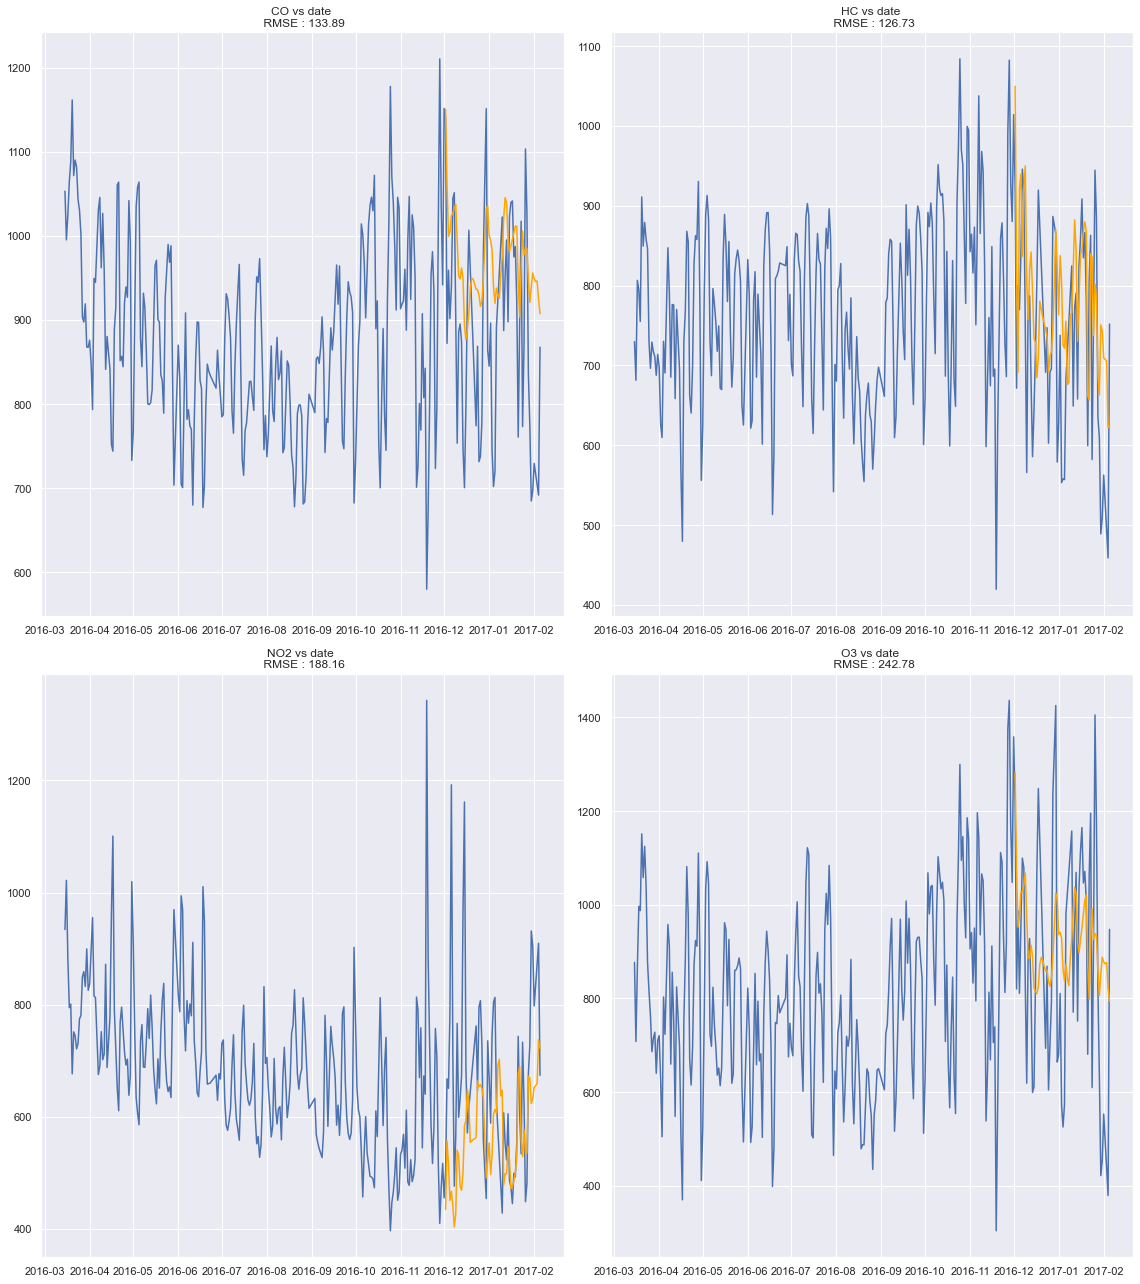

In [46]:

predictions = bestvar.results_.predict( start = testing.index.min() , end = testing.index.max() , exog = testing[['T' , 'RH','dewpt' , 'isweekend']])#.CO.to_frame()
predictions['HC'] = bestvma.results_.predict( start = testing.index.min() , end = testing.index.max() , exog = testing[['T' , 'RH','dewpt' , 'isweekend']])['HC']
predictions['NO2'] = sarimaxmodels['NO2']['model'].results_.predict( start = testing.index.min() , end = testing.index.max() , exog = testing[['T' , 'RH','dewpt' , 'isweekend']])
plt.figure(figsize = (16,18))

for i,col in  enumerate(['CO' , 'HC' , 'NO2' ,'O3']):
    plt.subplot(2 , 2, i+1)
  #  predictions = models[col].predict( start = train.index.min() , end = train.index.max()  , exog = train[['T' ,  'RH']])  
    
  #  resids[col] =  train[col] - predictions 
    
    plt.plot(cleaned.index, cleaned[col] )
 #   plt.plot(insamplepred[col] , color = 'Orange')

    
    plt.plot(predictions.index ,predictions[col] , color = 'orange')
    rsmetest = mean_squared_error(testing[col]  , predictions[col]  , squared = False  )
    plt.title(col + ' vs date \n RMSE : ' + str(round(rsmetest , 2)))

    #plt.plot(test[col], color = 'Orange')
plt.tight_layout()
plt.show()

- The models show a good fit to the data

# Evaluation on test set on kaggle

- The best hyperparameters are taken and fitted on the whole train set for kaggle

In [47]:
finalvar = bestvar.fit( cleaned[['T' , 'RH','dewpt' , 'isweekend']] ,  cleaned[['CO' , 'HC' , 'NO2' , 'O3']] )
finalvma = bestvma.fit(  cleaned[['T' , 'RH','dewpt' , 'isweekend']] , cleaned[['CO' , 'HC' , 'NO2' , 'O3']]  )
finalsarimax = sarimaxmodels['NO2']['model'].fit( cleaned[['T' , 'RH','dewpt' , 'isweekend']] , cleaned['NO2'] )

In [48]:
test = pd.read_csv('timeseriestest.csv',usecols=[0, 1,2,3,4])
test['Value'] = 0 
test =test.pivot(values = 'Value' , index = ['Date' , 'T' , 'RH'], columns = ['Gas']).reset_index()

test.columns.name = 'cols'
test = test.assign(Date = pd.to_datetime(test.Date  , dayfirst = True)  ).sort_values("Date").set_index('Date')
test

cols                T         RH  CO  HC  NO2  O3
Date                                             
2017-02-06   6.616667  51.734375   0   0    0   0
2017-02-07   7.613194  43.930903   0   0    0   0
2017-02-08   7.252083  50.966667   0   0    0   0
2017-02-09   7.473611  50.166319   0   0    0   0
2017-02-10   5.571875  46.604167   0   0    0   0
...               ...        ...  ..  ..  ...  ..
2017-04-05  17.554167  50.092708   0   0    0   0
2017-04-06  15.919792  35.959722   0   0    0   0
2017-04-07  15.489583  32.213542   0   0    0   0
2017-04-08  18.381250  33.686458   0   0    0   0
2017-04-09  16.966667  42.791667   0   0    0   0

[63 rows x 6 columns]

## Taking note of the days with negative Temperatures and relative humidity 
- Days with negative values also indicate the gas values are also most likely null 
- These days will be intepololate before the model `.predict` on them to generate the kaggle predictions 

In [49]:
test.query('T < 0 and RH < 0 ')


cols                 T          RH  CO  HC  NO2  O3
Date                                               
2017-02-13  -52.136458  -32.741667   0   0    0   0
2017-02-14 -200.000000 -200.000000   0   0    0   0
2017-02-15 -200.000000 -200.000000   0   0    0   0
2017-02-16 -174.005208 -168.239583   0   0    0   0

In [50]:
test[test[['T','RH']] < 0] = np.nan
test[['T','RH']] = test[['T','RH']].interpolate(method ="time", limit_direction = 'forward' )

## Feature Engineering on test set

In [51]:

test['dewpt']  = (243.04 * (np.log(test['RH']/100) + ((17.625*test['T'])/ (243.04 + test['T'])))  )/ \
 (17.625 - (np.log(test['RH']/100) + (17.625*test['T'])/ (243.04 + test['T'])) )
test['isweekend'] =(( test.index.dayofweek == 5 ) |  ( test.index.dayofweek == 6 ) ).astype(int)


## Prediction on test set

In [52]:
predfinal = finalvar.results_.predict( start = test.index.min() , end = test.index.max() , exog = test[['T' , 'RH','dewpt' , 'isweekend']])#.CO.to_frame()
predfinal['HC'] = finalvma.results_.predict( start = test.index.min() , end = test.index.max() , exog = test[['T' , 'RH','dewpt' , 'isweekend']])['HC']
predfinal['NO2'] = finalsarimax.results_.predict( start = test.index.min() , end = test.index.max() , exog = test[['T' , 'RH','dewpt' , 'isweekend']])

#  Replace the values with null values -160

In [53]:
predfinal.loc['2017-02-14'] = -160
predfinal.loc['2017-02-15'] = -160
predfinal.loc['2017-02-13'] = np.nan
predfinal.loc['2017-02-16'] = np.nan
predfinal = predfinal.interpolate(method ="time")

In [54]:
predfinal

CO          HC         NO2           O3
2017-02-06  950.706986  855.093747  592.979696  1053.931454
2017-02-07  917.331833  729.237620  649.143400   957.047193
2017-02-08  900.317577  760.628133  657.182558   910.896707
2017-02-09  896.066470  734.198608  659.721614   894.451952
2017-02-10  884.782676  692.501903  685.249608   876.813799
...                ...         ...         ...          ...
2017-04-05  903.983936  770.149527  558.488642   829.669627
2017-04-06  863.512166  726.163480  627.161732   789.323923
2017-04-07  842.812142  720.254993  653.405924   787.560662
2017-04-08  828.517095  660.279010  690.329917   758.688379
2017-04-09  833.206319  669.644940  652.285715   748.942576

[63 rows x 4 columns]

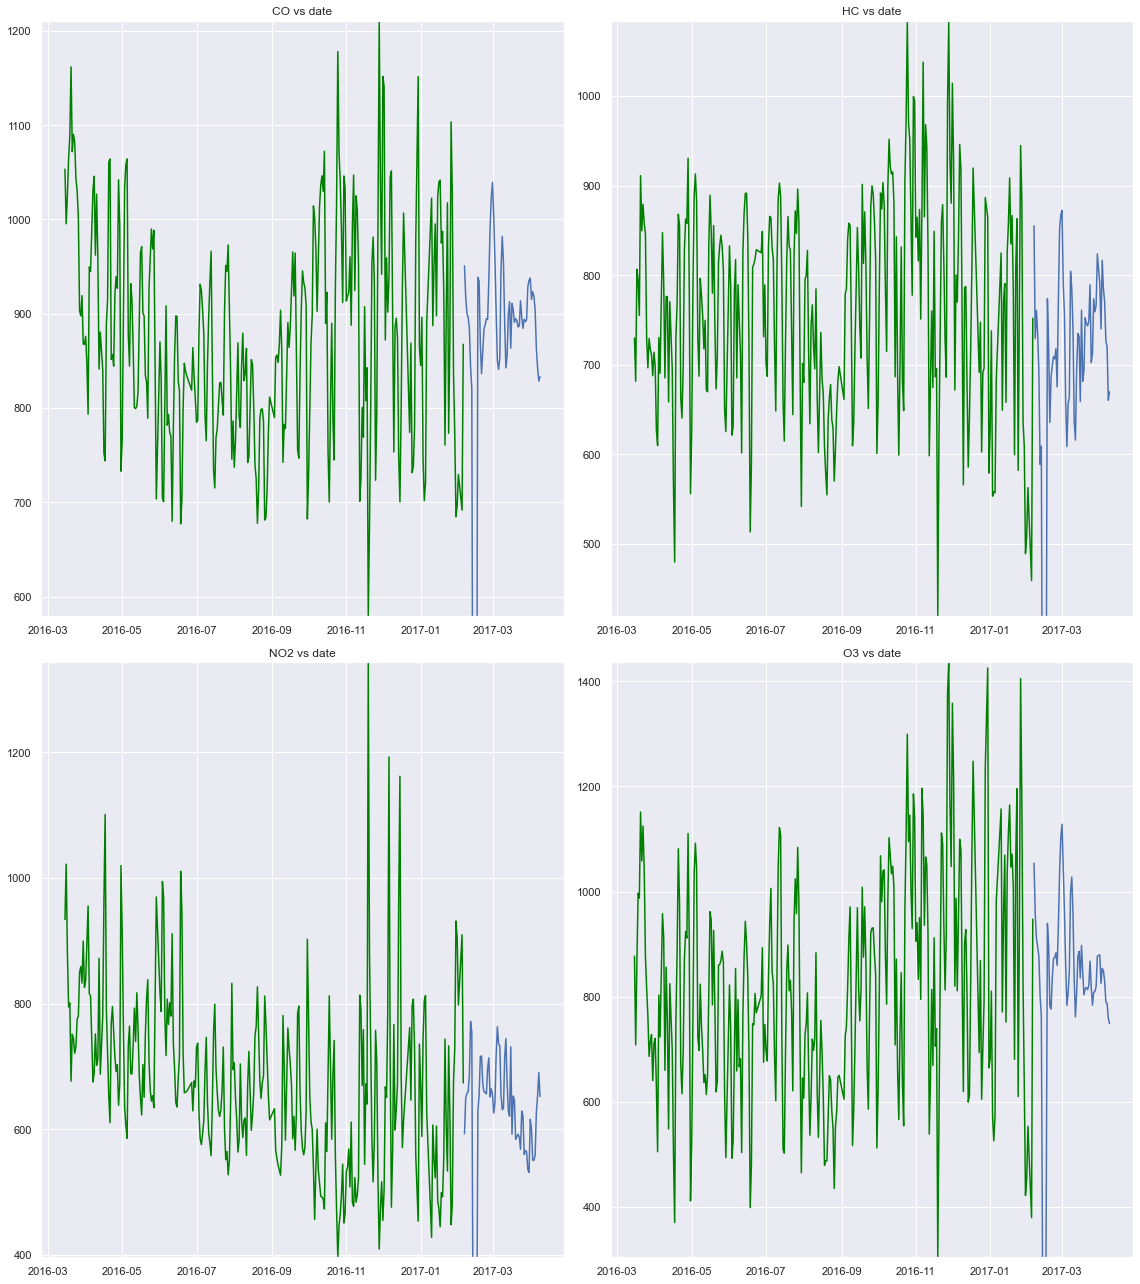

In [55]:
plt.figure(figsize = (16,18))
#insamplepred = finalm.predict()

for i,col in  enumerate(['CO' , 'HC' , 'NO2' ,'O3']):
    plt.subplot(2 , 2, i+1)
    plt.ylim(bottom = cleaned[col].min() , top =cleaned[col].max()  )
    plt.title(col + ' vs date')
  #  predictions = models[col].predict( start = train.index.min() , end = train.index.max()  , exog = train[['T' ,  'RH']])  
    
  #  resids[col] =  train[col] - predictions 
    
    plt.plot( cleaned[col] , color = 'Green')
 #   plt.plot(insamplepred[col] , color = 'Orange')
    
    plt.plot(predfinal[col])
    #plt.plot(test[col], color = 'Orange')
plt.tight_layout()
plt.show()

## Generate CSV

In [56]:
predss= predfinal.reset_index().melt(id_vars = ['index'] , var_name = 'gas' , value_name ='value')

In [57]:
predss

index gas       value
0   2017-02-06  CO  950.706986
1   2017-02-07  CO  917.331833
2   2017-02-08  CO  900.317577
3   2017-02-09  CO  896.066470
4   2017-02-10  CO  884.782676
..         ...  ..         ...
247 2017-04-05  O3  829.669627
248 2017-04-06  O3  789.323923
249 2017-04-07  O3  787.560662
250 2017-04-08  O3  758.688379
251 2017-04-09  O3  748.942576

[252 rows x 3 columns]

In [58]:
mapping = pd.read_csv('timeseriestest.csv',usecols=[0, 1,4])

mapping.Date  = pd.to_datetime(mapping.Date , dayfirst = True)

In [59]:
mapping.Date

0     2017-02-06
1     2017-02-07
2     2017-02-08
3     2017-02-09
4     2017-02-10
         ...    
247   2017-04-05
248   2017-04-06
249   2017-04-07
250   2017-04-08
251   2017-04-09
Name: Date, Length: 252, dtype: datetime64[ns]

In [60]:
predss['index']

0     2017-02-06
1     2017-02-07
2     2017-02-08
3     2017-02-09
4     2017-02-10
         ...    
247   2017-04-05
248   2017-04-06
249   2017-04-07
250   2017-04-08
251   2017-04-09
Name: index, Length: 252, dtype: datetime64[ns]

In [61]:
from pandasql import sqldf

sqldf('select * from mapping m join predss p on p.gas = m.Gas and p.[index] = m.Date')[['id' ,'value']].to_csv("kaggle.csv")

- We have successfully built a forecasting model for these gases through hyperparameter tuning, feature engineering and data exploration